<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Projet_TDA%2B_Signature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📝Projet TDA + Signature, de Jean Marius KOMBOU**

**Base de données de motifs EMG** : Pour l'enregistrement des motifs, un bracelet MYO Thalmic est utilisé, porté sur l'avant-bras de l'utilisateur, ainsi qu'un PC avec un récepteur Bluetooth. Le bracelet est équipé de huit capteurs espacés uniformément autour de l'avant-bras qui acquièrent simultanément des signaux myographiques. Les signaux sont envoyés via une interface Bluetooth vers un PC.

Les données brutes d'EMG pour 36 sujets sont présentées, tandis qu'ils réalisaient une série de gestes statiques de la main. Chaque sujet effectue deux séries, chacune composée de six (ou sept) gestes de base. Chaque geste a été réalisé pendant 3 secondes avec une pause de 3 secondes entre les gestes.

Chaque fichier est composé de 10 colonnes :

🔹 Une colonne Temps (`temps`) - temps en ms ;

🔹8 colonnes de canaux EMG du bracelet MYO Thalmic (`channel1`... `channel8`) :  

*   0 - données non marquées `channel1`,
*   1 - main au repos `channel2`,
*   2 - main serrée en poing `channel3`,
*   3 - flexion du poignet `channel4`,
*   4 - extension du poignet `channel5`,
*   5 - déviations radiales `channel6`,
*   6 - déviations ulnaires `channel7`,
*   7 - paume étendue (le geste n'a pas été effectué par tous les sujets) `channel8`

🔹Une colonne `class` - le label des gestes. On a 7 classes uniques de 0 à 6.


**Objectif: L'objectif principal** est de prédire la valeur de la colonne `class` en fonction des données fournies par les 8 canaux en appliquant les méthodes de TDA.

## **1- Description des données**

In [ ]:
import pandas as pd
# URL du fichier de données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"

# Charger les données dans un DataFrame
data = pd.read_csv(url, sep="\t")

# Afficher les premières lignes du DataFrame pour vérifier
data.head()

time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  
0  -0.00001      0  
1  -0.00001      0  
2   0.00001      0  
3   0.00001      0  
4   0.00001      0

Notre jeu de données a **63196** lignes.

In [ ]:
data.shape

(63196, 10)

**🧮 Nombre de classes du jeu de données**

In [ ]:
# Calculer le nombre de classes uniques dans la colonne 'Class'
nombre_classes = data['class'].nunique()

# Afficher le nombre de classes
print("Nombre de classes uniques :", nombre_classes)

# Pour voir la liste des classes uniques
classes_uniques = data['class'].unique()
print("Classes uniques :", classes_uniques)

Nombre de classes uniques : 7
Classes uniques : [0 1 2 3 4 5 6]


In [ ]:
sumarize = data.describe()
print(sumarize)

               time      channel1      channel2      channel3      channel4  \
count  63196.000000  63196.000000  63196.000000  63196.000000  63196.000000   
mean   32777.490094     -0.000008     -0.000009     -0.000009     -0.000010   
std    18943.835626      0.000144      0.000134      0.000124      0.000155   
min        1.000000     -0.001110     -0.001020     -0.000910     -0.001040   
25%    16340.750000     -0.000030     -0.000040     -0.000050     -0.000040   
50%    32781.500000     -0.000010     -0.000010     -0.000010     -0.000010   
75%    49199.250000      0.000010      0.000020      0.000030      0.000020   
max    65661.000000      0.001270      0.001270      0.001270      0.001270   

           channel5     channel6      channel7      channel8         class  
count  63196.000000  63196.00000  63196.000000  63196.000000  63196.000000  
mean      -0.000012     -0.00001     -0.000008     -0.000008      1.212086  
std        0.000198      0.00016      0.000133      0.000

**Qualité des données**

In [ ]:
# Qualité des données
print("\nValeurs manquantes par colonne:")
print(data.isnull().sum())
print("\nNombre de doublons:")
print(data.duplicated().sum())


Valeurs manquantes par colonne:
time        0
channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       0
dtype: int64

Nombre de doublons:
0


Il n'y a pas de valeurs manquantes, pas de doublons.

In [ ]:
distribution_classes = data['class'].value_counts()
print(distribution_classes)

class
0    41272
3     3816
1     3780
6     3747
5     3615
2     3525
4     3441
Name: count, dtype: int64


⚖️  La distribution montre un **déséquilibre** important entre les classes. Par exemple, la classe 0 contient 41 272 occurrences, alors que les autres classes en contiennent entre 3 441 et 3 816 occurrences. Cela pourrait poser des problèmes pour l'entraînement de modèles de Machine Learning, car les classes minoritaires risquent d'être sous-représentées dans les prédictions.

La somme de tous les nombres de classe est de (41272+3816+3780+3747+3615+3525+3441)= 63 196, ce qui correspond au nombre de lignes de notre data set (`data.shape = (63 196, 10)`)  

**📊 Histogramme pour les variables numérique**s

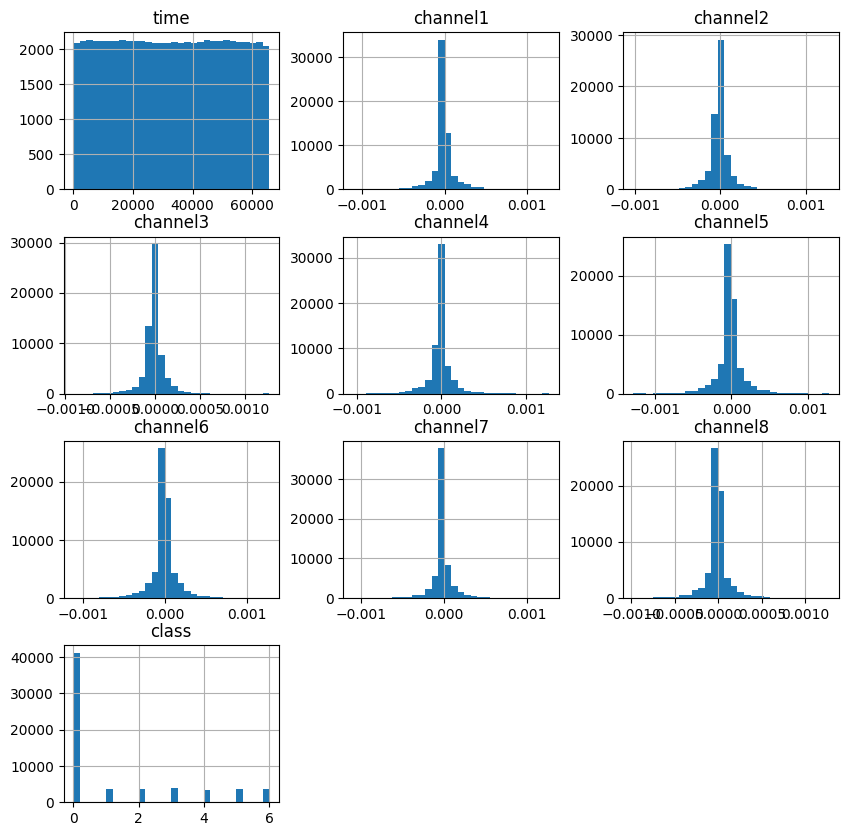

In [ ]:
# Histogramme pour les variables numériques
import matplotlib.pyplot as plt
data.hist(bins=30, figsize=(10, 10))
plt.show()

La classe 0 représente des **"données non marquées"** ou une situation de "repos" ou "absence de geste", il est **normal qu'elle soit plus fréquente**, surtout dans les contextes où les gestes spécifiques ne sont exécutés que brièvement et/ou moins fréquemment. Ensuite la classe 3 est la plus fréquente. D'accord que ce n'est pas très visible sur mon histogramme.

**Heatmap**

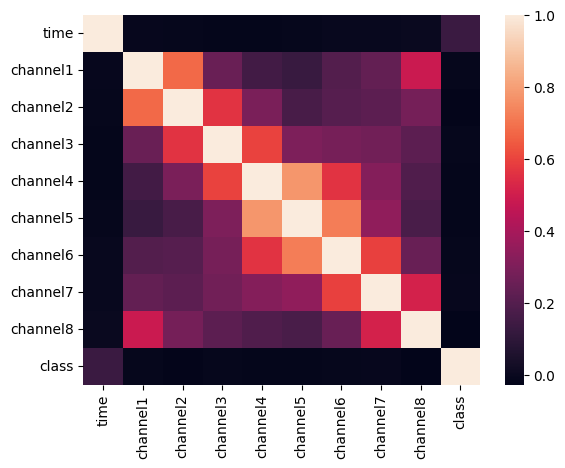

In [ ]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr())
plt.show()

💡 On observe pas une corrélation entre un channel et class. Il n'y a pas un channel qui a plus d'impact que d'autres sur la classe.

**Corrélation** entre les channels.

In [ ]:
# Calculer la matrice de corrélation entre les channels
correlation_matrix = data.iloc[:, 1:9].corr()
correlation_matrix

channel1  channel2  channel3  channel4  channel5  channel6  \
channel1  1.000000  0.676714  0.250755  0.153744  0.129514  0.196495   
channel2  0.676714  1.000000  0.561955  0.293439  0.167850  0.205321   
channel3  0.250755  0.561955  1.000000  0.597895  0.299820  0.283542   
channel4  0.153744  0.293439  0.597895  1.000000  0.777541  0.561263   
channel5  0.129514  0.167850  0.299820  0.777541  1.000000  0.722278   
channel6  0.196495  0.205321  0.283542  0.561263  0.722278  1.000000   
channel7  0.238019  0.221467  0.271200  0.317886  0.344329  0.593005   
channel8  0.483517  0.280637  0.218356  0.186640  0.171012  0.248792   

          channel7  channel8  
channel1  0.238019  0.483517  
channel2  0.221467  0.280637  
channel3  0.271200  0.218356  
channel4  0.317886  0.186640  
channel5  0.344329  0.171012  
channel6  0.593005  0.248792  
channel7  1.000000  0.514066  
channel8  0.514066  1.000000

On observe une **forte corrélation positive** entre le "channel 4" et le "channel 5", entre "channel 6" et le "channel 5", "channel 1" et le "channel 2".

📊  Voici le **diagramme en barres** empilées montrant la contribution de chaque canal dans les classes respectives. Chaque barre représente une classe et la contribution de chaque canal dans cette classe.

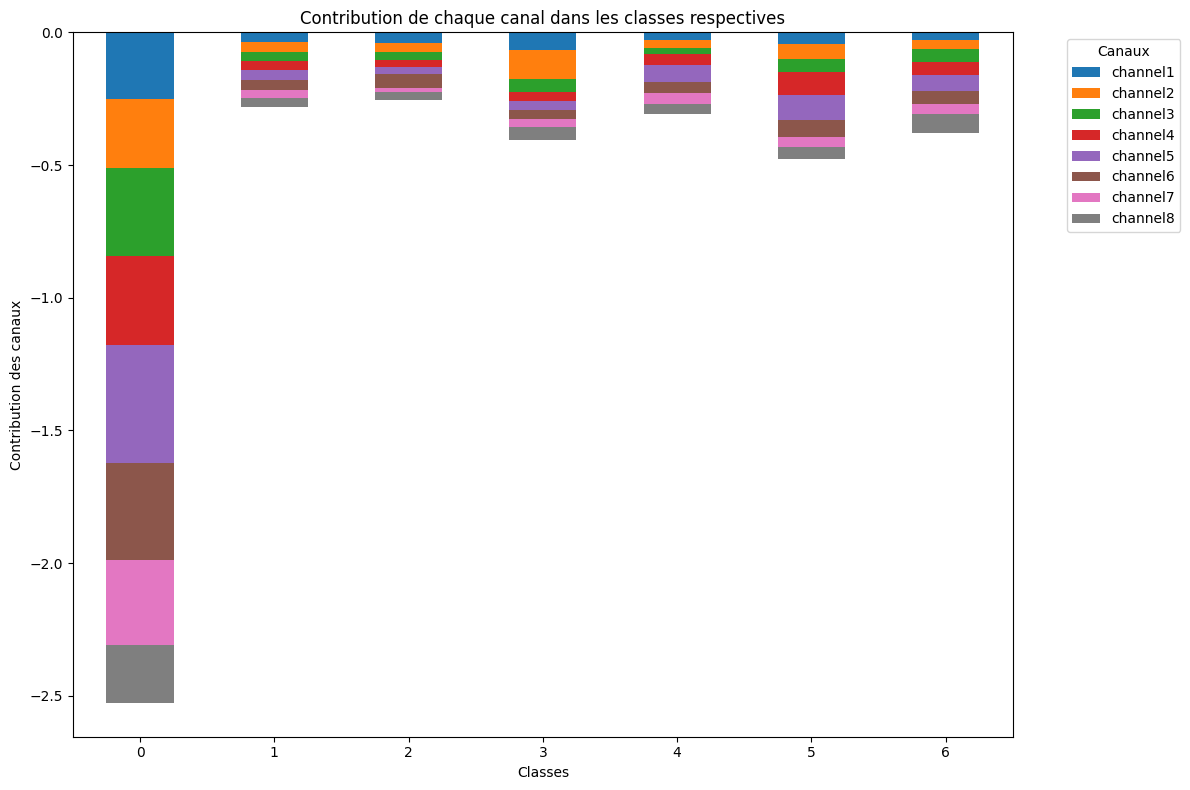

In [ ]:
import matplotlib.pyplot as plt

# Calculer la somme des valeurs par canal pour chaque classe
channel_class_sum = data.iloc[:, 1:9].groupby(data['class']).sum()

# Créer un diagramme en barres montrant la contribution de chaque canal dans les classes respectives
channel_class_sum.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Contribution de chaque canal dans les classes respectives')
plt.xlabel('Classes')
plt.ylabel('Contribution des canaux')
plt.xticks(rotation=0)  # Pour une meilleure lisibilité des labels des classes
plt.legend(title='Canaux', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


On observe que chaque classe contient la **contribution** de tous les channels (canaux) mais à proportions variées.

## **2. Découper la série temporelle de manière à récupérer plusieurs séries à label unique**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Charger les données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"
data = pd.read_csv(url, sep="\t")

# Découper la série en sous-séries avec labels uniques
changes = data['class'].diff().ne(0)
change_indices = changes[changes].index.tolist()
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])


**Normalisation** : on exclut la colonne `class` car si on normalise la colonne `class`, on va modifiez ses valeurs d'origine, ce qui peut rendre les étiquettes incompréhensibles ou inutilisables pour l'apprentissage supervisé.

In [ ]:
# Vérifier que chaque sous-série a un label unique
for sub in sub_series:
    assert sub['class'].nunique() == 1, "Une sous-série contient plusieurs labels."

# Normalisation des sous-séries
scaler = MinMaxScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('class')
normalized_sub_series = []

On **visualise** les sous-séries normalisées

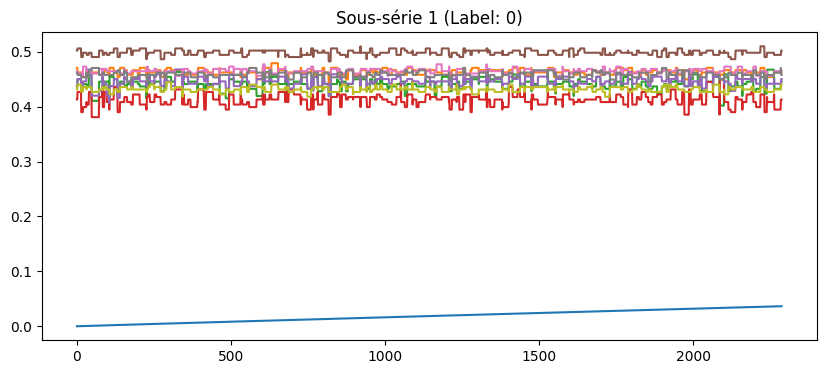

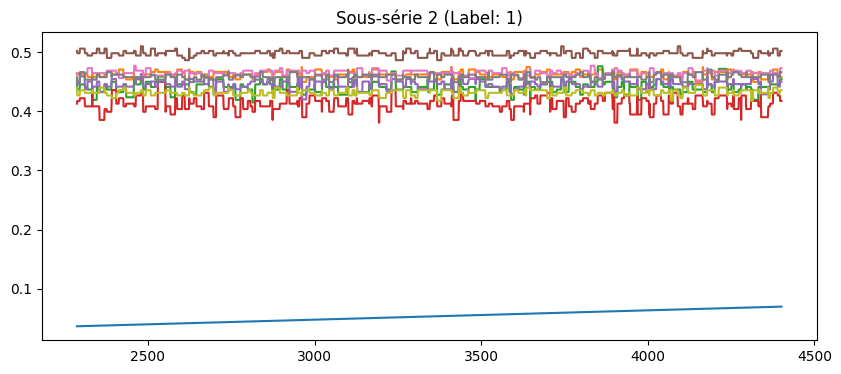

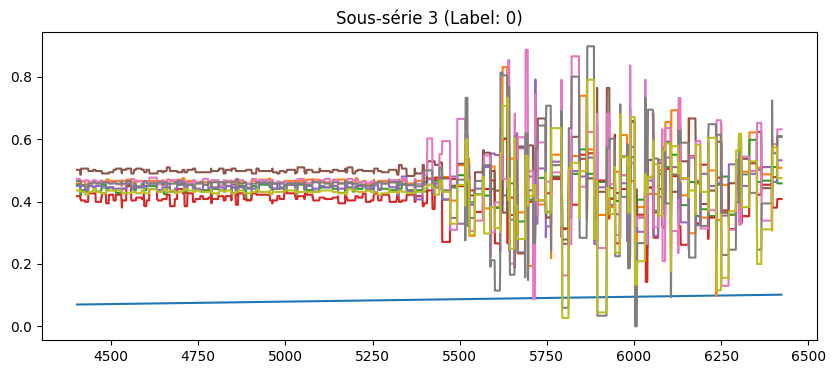

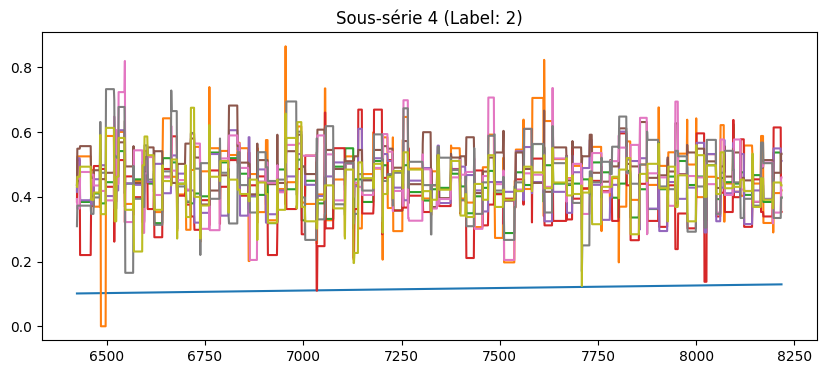

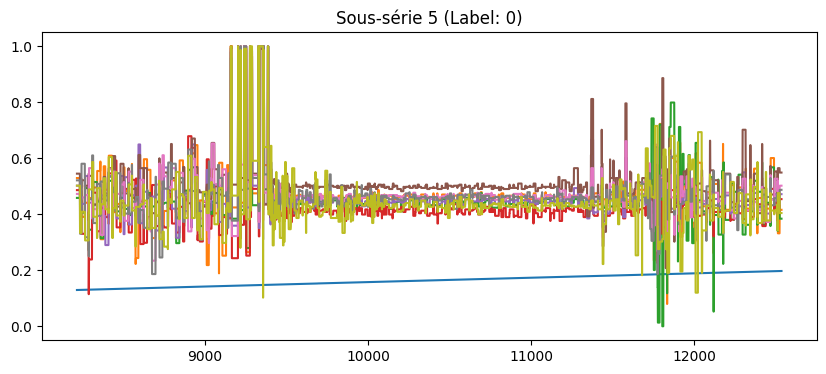

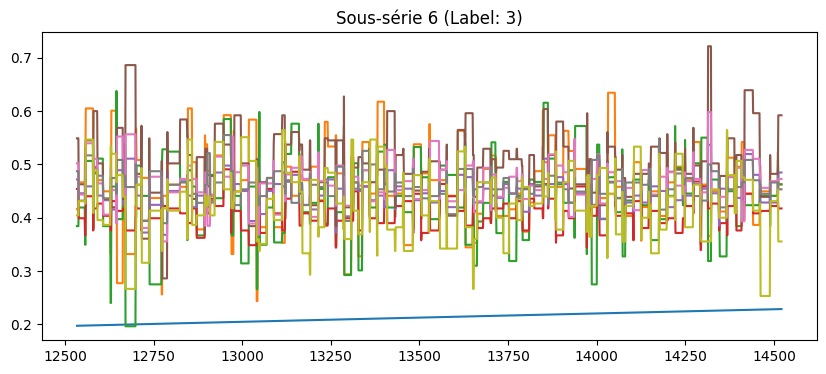

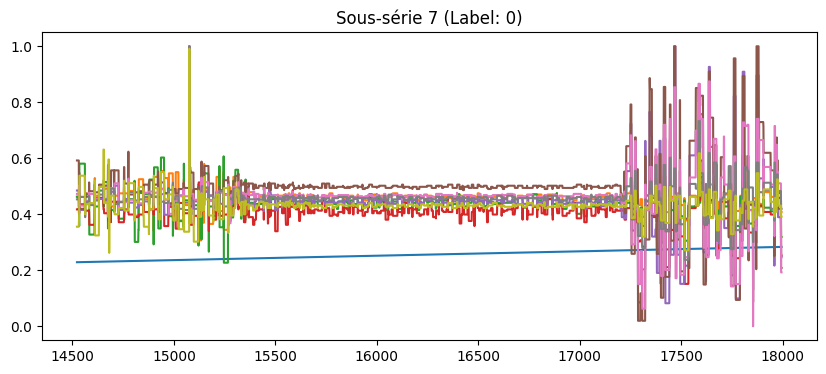

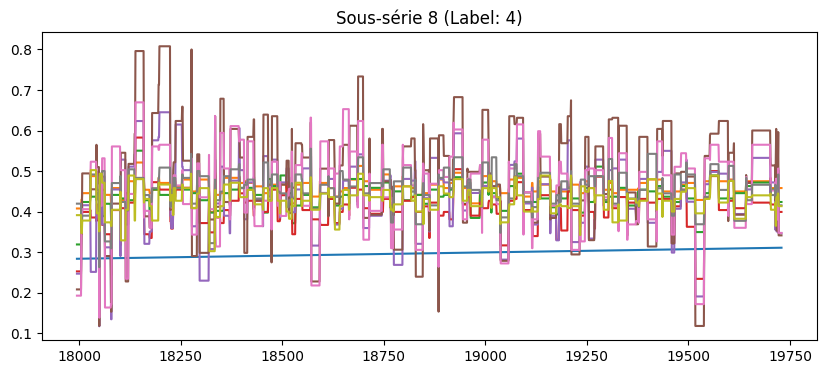

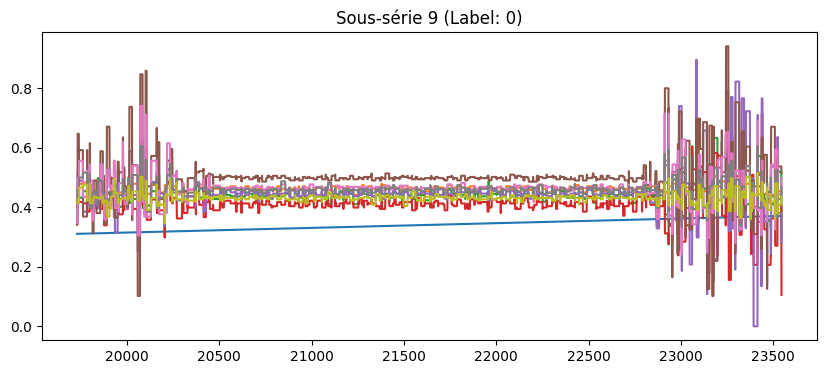

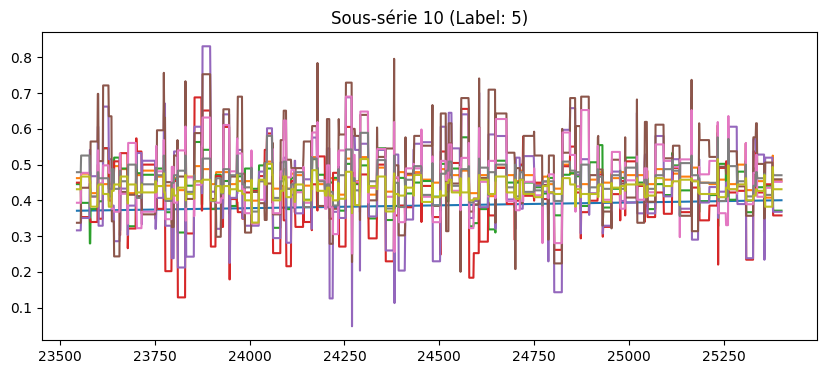

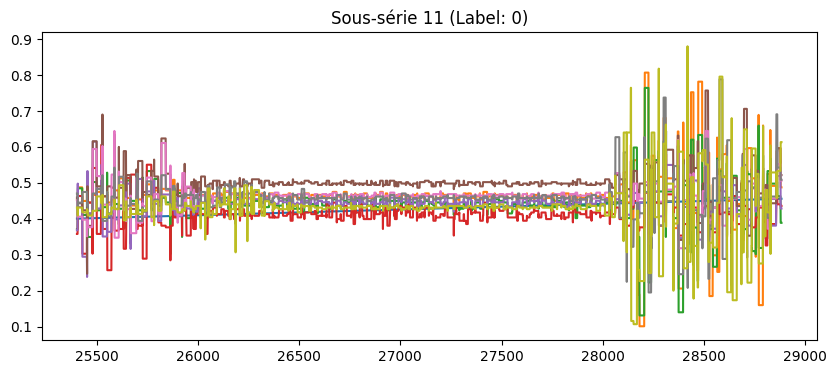

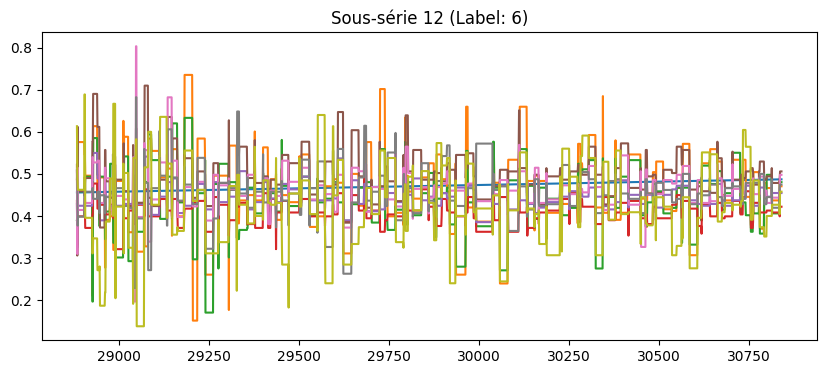

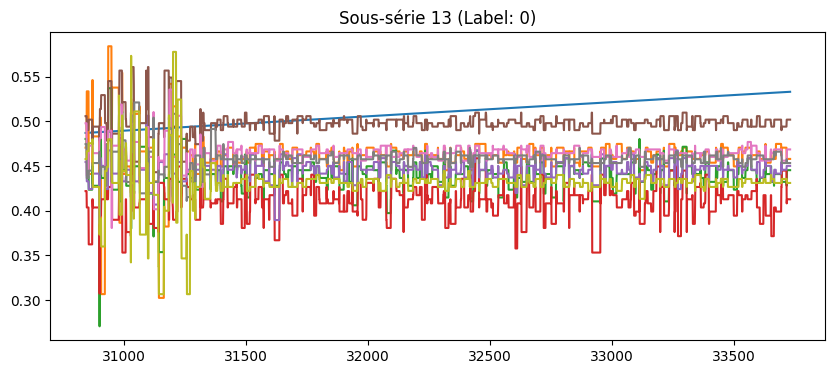

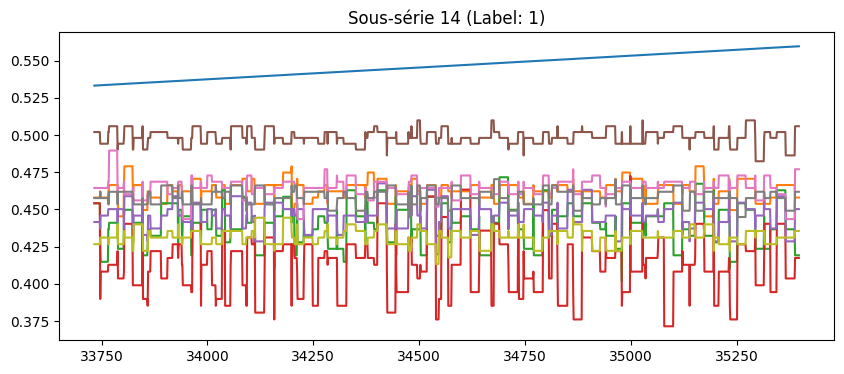

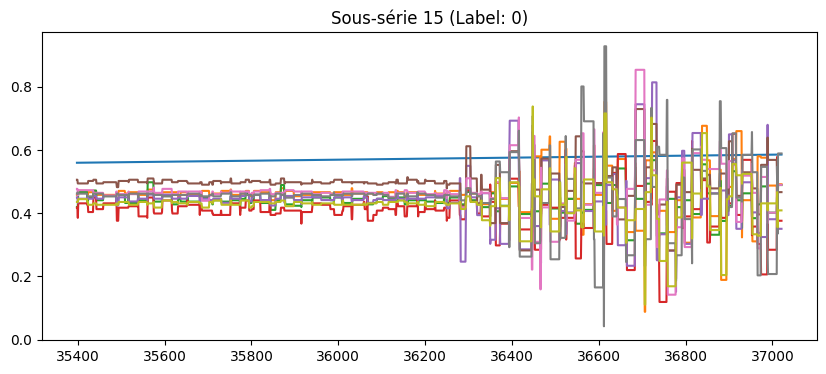

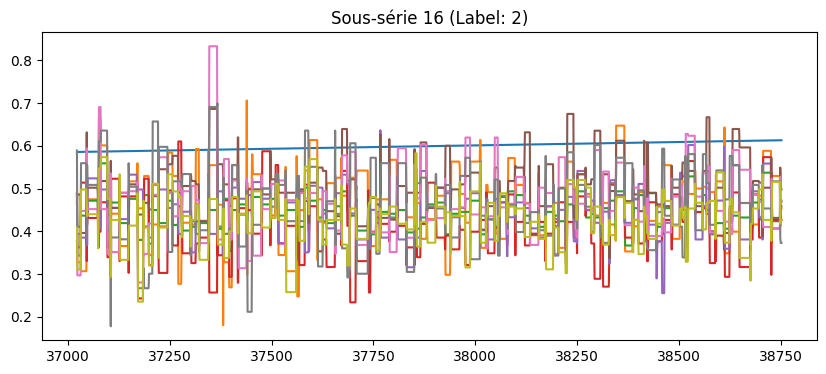

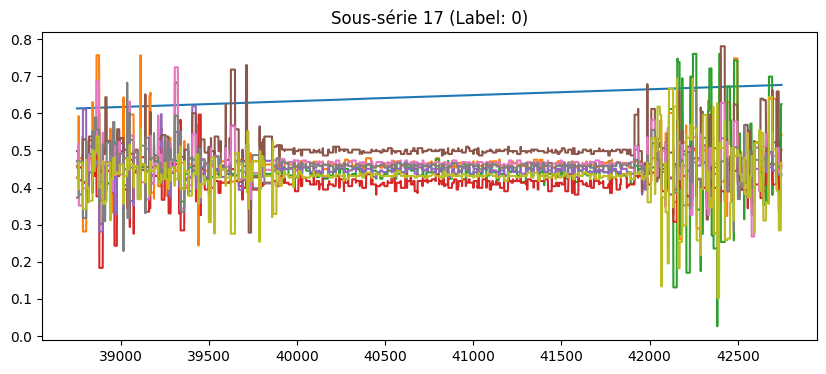

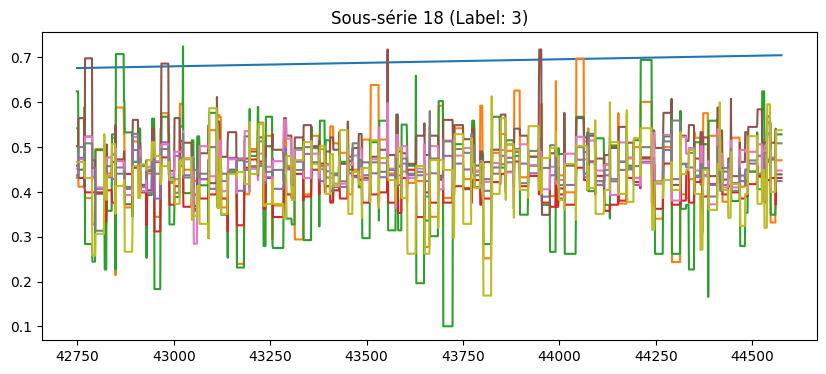

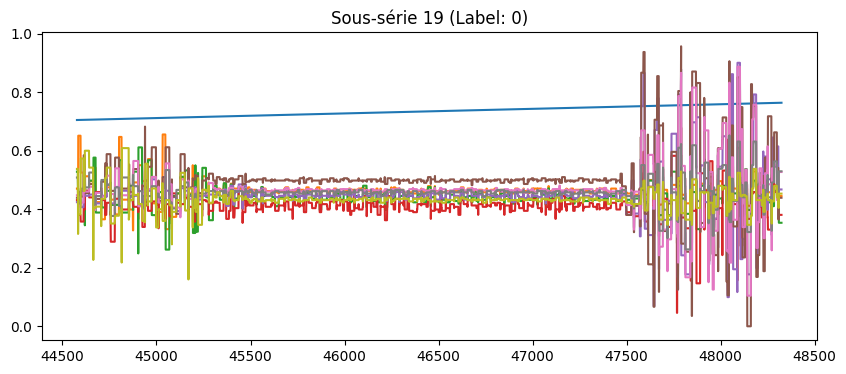

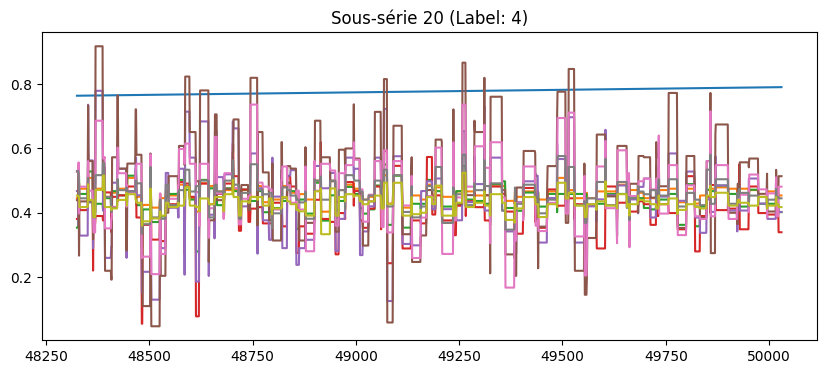

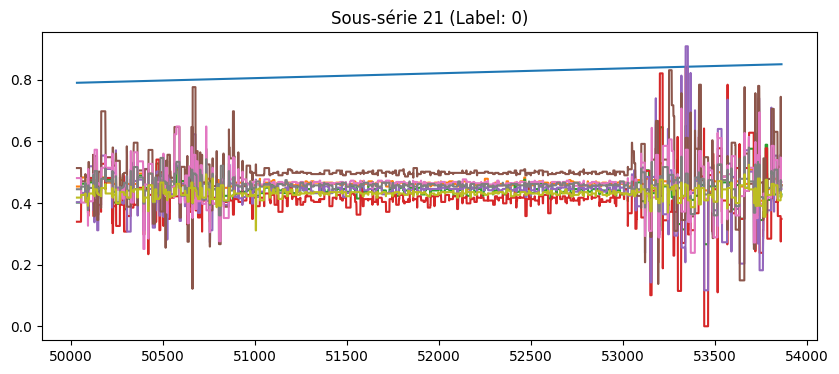

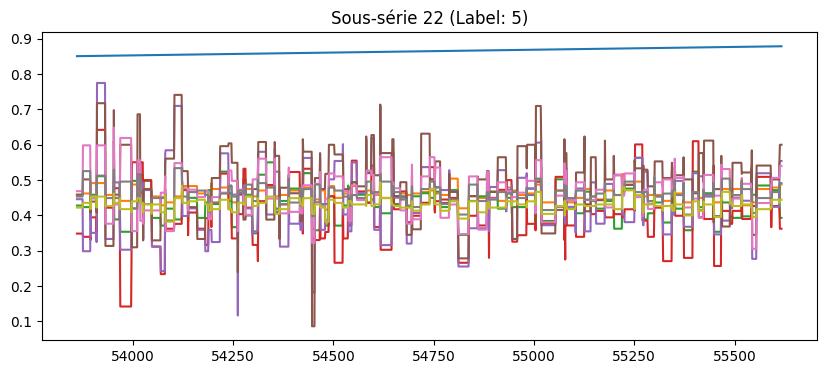

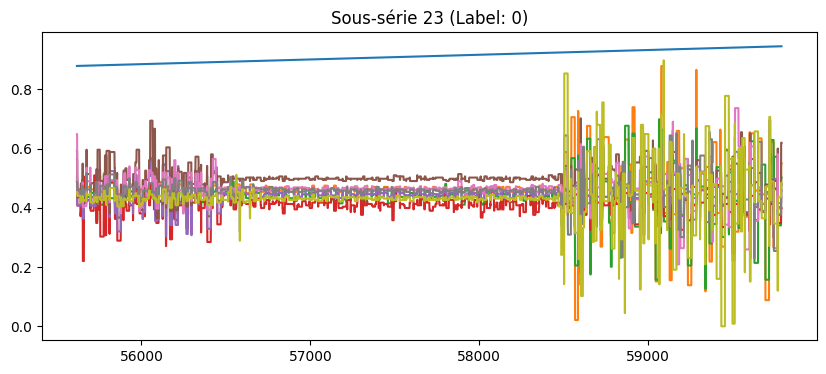

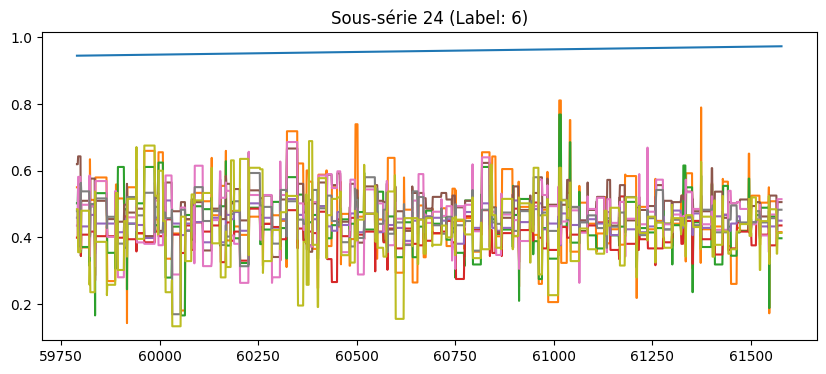

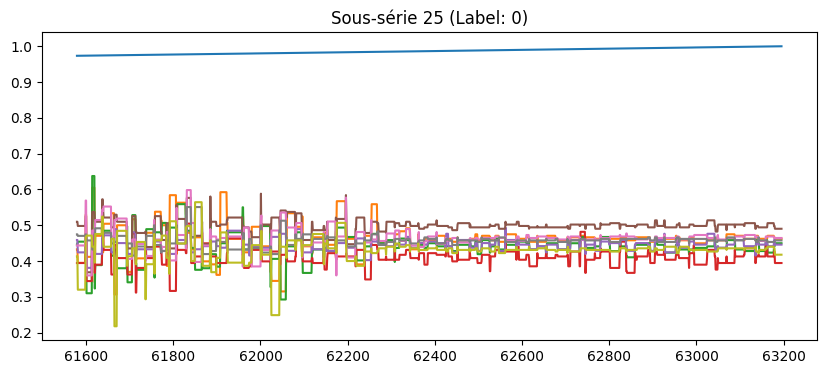

In [ ]:
# Appliquer la normalisation
scaler.fit(data[numeric_columns])  # Normalisation globale
for sub in sub_series:
    sub_scaled = sub.copy()
    sub_scaled[numeric_columns] = scaler.transform(sub[numeric_columns])
    normalized_sub_series.append(sub_scaled)

# Visualiser les sous-séries normalisées
for i, sub in enumerate(normalized_sub_series):
    plt.figure(figsize=(10, 4))
    plt.plot(sub[numeric_columns])
    plt.title(f"Sous-série {i + 1} (Label: {sub['class'].iloc[0]})")
    plt.show()

Les graphes de chaque sous série normalisé sont différents, par exemple:  

**Sous-série 9 (Label: 0)** : On observe une tendance générale relativement stable, avec des fluctuations fréquentes et importantes. La normalisation des données permet de mieux visualiser ces variations.

**Sous-série 10 (Label: 5)** : Cette sous-série présente un comportement plus régulier et oscillant autour de la valeur moyenne. L'absence de tendance évidente pourrait signifier un comportement relativement stationnaire des données.

**Sous-série 11 (Label: 0)** : Ici aussi, les données montrent une oscillation autour de la moyenne. On remarque une instabilité plus marquée que dans la sous-série 10, avec des variations plus accentuées dans certaines périodes.

**Sous-série 14 (Label: 1)** : Contrairement aux autres sous-séries, celle-ci semble comporter une tendance légère à la hausse, ce qui pourrait indiquer un changement progressif au fil du temps. Les données fluctuent autour de cette tendance, avec des pics et des creux marqués

## **3. Utiliser la TDA pour créer un modèle de classification. Que peut on dire?**

Installation des bibliothèques Python

In [ ]:
!pip install gudhi
#!pip install --upgrade gudhi
!pip install giotto-tda
!pip install giotto-tda scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.6/460.6 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


 Importation des bibliothèques nécessaires pour effectuer une analyse de données

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy, Amplitude

Extraction des **caractéristiques topologiques**. *Temps d'exécution : 28 min*

In [ ]:
############## Pour avoir un temps d'exécution plus rapide#####
# from sklearn.metrics import accuracy_score, pairwise_distances
# # Sous-échantillonnage des séries temporelles
# time_series_data = [sub[numeric_columns].values[::2] for sub in normalized_sub_series]

# # Pré-calcul des matrices de distance
# distance_matrices = [pairwise_distances(series) for series in time_series_data]

# # Calcul des diagrammes de persistance avec parallélisation et optimisation
# persistence = VietorisRipsPersistence(
#     homology_dimensions=[0, 1],
#     max_edge_length=1.0,
#     collapse_edges=True,
#     n_jobs=-1
# )
# diagrams = persistence.fit_transform(distance_matrices)
######################################################

# Convertir les sous-séries en un format adapté à la TDA
time_series_data = [sub[numeric_columns].values for sub in normalized_sub_series]
labels = [sub['class'].iloc[0] for sub in normalized_sub_series]

# Calculer les diagrammes de persistance
homology_dimensions = [0, 1]  # Dimensions d'homologie à calculer (0 pour les composantes connexes, 1 pour les cycles)
persistence = VietorisRipsPersistence(homology_dimensions=homology_dimensions)
diagrams = persistence.fit_transform(time_series_data)

# Extraire des caractéristiques à partir des diagrammes de persistance
entropy = PersistenceEntropy()
amplitude = Amplitude(metric='wasserstein')

X_entropy = entropy.fit_transform(diagrams)
X_amplitude = amplitude.fit_transform(diagrams)

# Combiner les caractéristiques
X = np.hstack([X_entropy, X_amplitude])
y = np.array(labels)

Entraînement d'un modèle de **classification**

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un classifieur (par exemple, une forêt aléatoire)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.40



*   L'évaluation de notre modèle donne une **précision globale de 40%**, ce
 qui suggère que le modèle a du mal à distinguer les classes.
*   Le jeu de données est déséquilibré : certaines classes ont très peu d'exemples **(classes 2, 5)**, ce qui rend difficile l'apprentissage de ces classes pour le modèle.
*   Le modèle a tendance à privilégier la classe 0 (majoritaire dans le jeu de test).
*   Avec seulement **17 séries** pour l'entraînement et **8 séries** pour le test, le jeu de données est peut-être très petit, ce qui limite la capacité du modèle à généraliser.

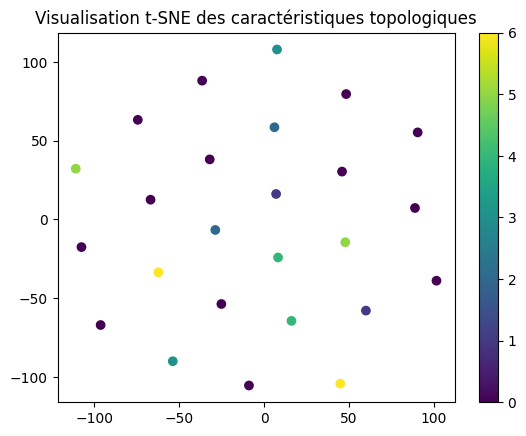

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity= 24)
X_embedded = tsne.fit_transform(X)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title("Visualisation t-SNE des caractéristiques topologiques")
plt.show()

Cette visualisation nous permet d'observer qu'il y'a  vraiment 7 classes dans notre jeu de données. Les groupes de points proches les uns des autres peuvent indiquer des groupes de données similaires.



---



## **4. Faire de même en enlevant les classes 0. Que peut on dire?**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy, Amplitude
import numpy as np

# Charger les données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"
data = pd.read_csv(url, sep="\t")

# Découper la série en sous-séries avec labels uniques
changes = data['class'].diff().ne(0)
change_indices = changes[changes].index.tolist()
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])

On enlève la **classe 0**

In [ ]:
# Filtrer les sous-séries pour supprimer la classe 0
filtered_sub_series = [sub for sub in sub_series if sub['class'].iloc[0] != 0]


In [ ]:
# Vérifier que chaque sous-série a un label unique
for sub in filtered_sub_series:
    assert sub['class'].nunique() == 1, "Une sous-série contient plusieurs labels."

# Normalisation des sous-séries filtrées
scaler = MinMaxScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('class')
normalized_sub_series = []


# Appliquer la normalisation
scaler.fit(data[numeric_columns])  # Normalisation globale
for sub in filtered_sub_series:
    sub_scaled = sub.copy()
    sub_scaled[numeric_columns] = scaler.transform(sub[numeric_columns])
    normalized_sub_series.append(sub_scaled)

In [ ]:
# Convertir les sous-séries en un format adapté à la TDA
time_series_data = [sub[numeric_columns].values for sub in normalized_sub_series]
labels = [sub['class'].iloc[0] for sub in normalized_sub_series]

# Calculer les diagrammes de persistance
homology_dimensions = [0, 1]  # Dimensions d'homologie à calculer (0 pour les composantes connexes, 1 pour les cycles)
persistence = VietorisRipsPersistence(homology_dimensions=homology_dimensions)
diagrams = persistence.fit_transform(time_series_data)

# Extraire des caractéristiques à partir des diagrammes de persistance
entropy = PersistenceEntropy()
amplitude = Amplitude(metric='wasserstein')

X_entropy = entropy.fit_transform(diagrams)
X_amplitude = amplitude.fit_transform(diagrams)

# Combiner les caractéristiques
X = np.hstack([X_entropy, X_amplitude])
y = np.array(labels)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un classifieur (par exemple, une forêt aléatoire)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.33


😡 Même en supprimant la classe 0 on ne s'en sors pas mieux!!!!! D'ailleurs on a même  un moin bon score que précedement. Je pense qu'on devrait essayer **d'augmenter la taille** du jeu de données, et peut-être également **filtrer ou lisser** les séries temporelles pour réduire le bruit.

##  **5. Créer le complexe simplicial sur les séries temporelles de la question 2. Pouvait on deviner la différence entre les questions 3 et 4 en regardant la persistance de ce complexe?**  

### **5.1 Persistance**

In [4]:
import pandas as pd
# URL du fichier de données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"

# Charger les données dans un DataFrame
data = pd.read_csv(url, sep="\t")

On applique une **normalisation** avec `MinMaxScaler`

In [5]:
import gudhi as gd
from sklearn.preprocessing import MinMaxScaler

# Identifier les colonnes numériques (en excluant la colonne 'class' si elle existe)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Créer une instance de MinMaxScaler
scaler = MinMaxScaler()

# Appliquer la normalisation uniquement aux colonnes numériques
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

On conserve les sous-séries basées sur les changements de labels

In [6]:
# Identifier où les changements de label se produisent
changes = data['class'].diff().ne(0)  # diff() calcule la différence entre chaque élément et son précédent
change_indices = changes[changes].index.tolist()  # récupérer les indices des changements

# Ajouter le premier index de la série et le dernier index de la série pour compléter les sous-séries
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])


**Normalisation**

In [7]:
# Normalisation des colonnes numériques de chaque sous-série
normalized_sub_series = []
scaler = MinMaxScaler()

for sub in sub_series:
    # Identifier les colonnes numériques
    numeric_columns = sub.select_dtypes(include=['float64', 'int64']).columns

    # Normaliser les colonnes numériques
    sub_scaled = sub.copy()
    sub_scaled[numeric_columns] = scaler.fit_transform(sub[numeric_columns])
    normalized_sub_series.append(sub_scaled)


On crée des **complexes simpliciaux** pour chaque sous-série, basés sur le modèle de Vietoris-Rips.

In [ ]:
import gc
# Paramètres pour la filtration de Rips
max_edge_length = 0.5  # Longueur maximale des arêtes
max_dimension = 3      # Dimension maximale des simplices

rips_complexes = []
batch_size = 10
max_points = 50  # Limite encore plus stricte pour chaque sous-série

for batch_start in range(0, len(normalized_sub_series), batch_size):
    batch = normalized_sub_series[batch_start:batch_start + batch_size]
    for i, sub in enumerate(batch):
        # Réduction des points
        if len(sub) > max_points:
            sub = sub.sample(n=max_points, random_state=42)

        # Extraction des points
        point_cloud = sub.select_dtypes(include=['float64', 'int64']).values

        # Création du complexe de Rips
        rips_complex = gd.RipsComplex(points=point_cloud, max_edge_length=max_edge_length)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)

        # Sauvegarder le complexe simplicial dans la liste
        rips_complexes.append(simplex_tree)

        #print(f"Sous-série {batch_start + i + 1}: Complexe créé avec {simplex_tree.num_simplices()} simplices.")
    gc.collect()


Les sous-séries génèrent des complexes de tailles variées, ce qui est attendu. Par exemple :

📌 Sous-série 3 : 3244 simplices

📌 Sous-série 5 : 9518 simplices

📌 Sous-série 19 : 4542 simplices

Calcul et visualisation de la **persistance** pour chaque sous-série

Sous-série 1: Diagramme de persistance


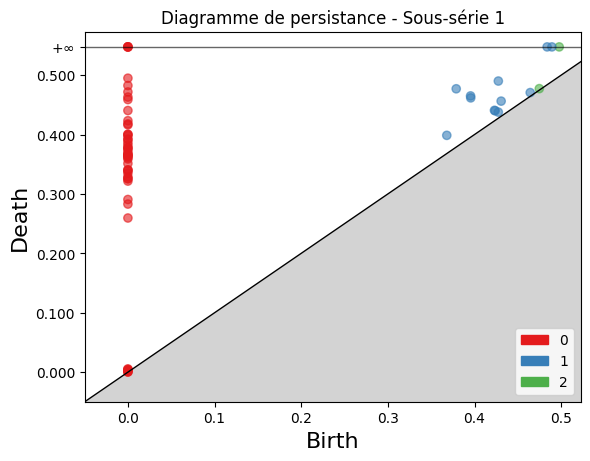

Sous-série 2: Diagramme de persistance


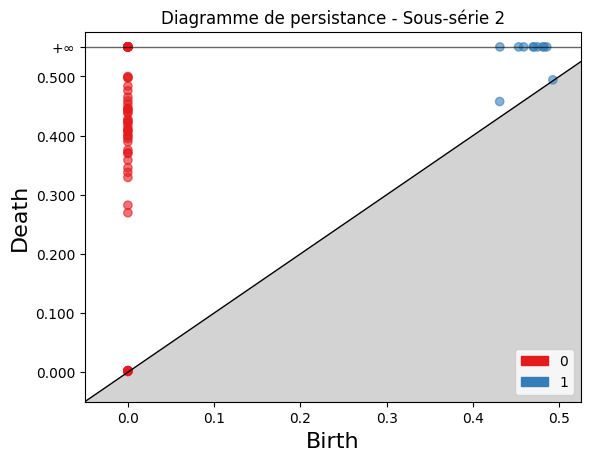

Sous-série 3: Diagramme de persistance


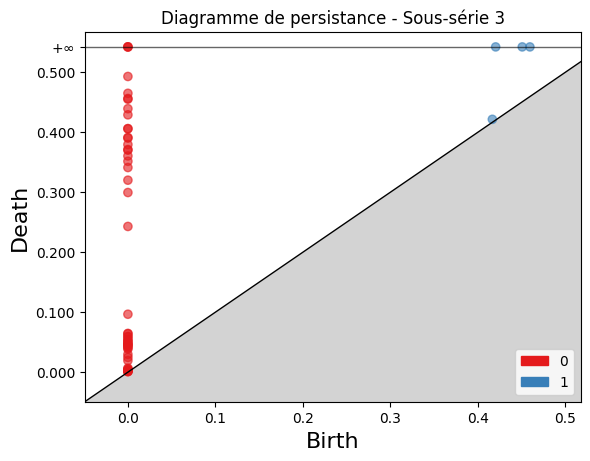

Sous-série 4: Diagramme de persistance


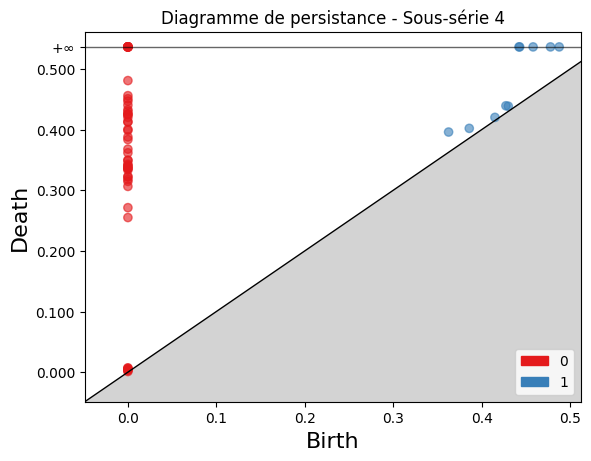

Sous-série 5: Diagramme de persistance


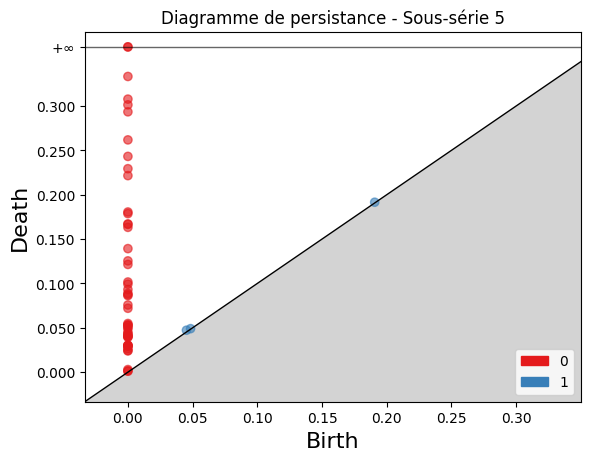

Sous-série 6: Diagramme de persistance


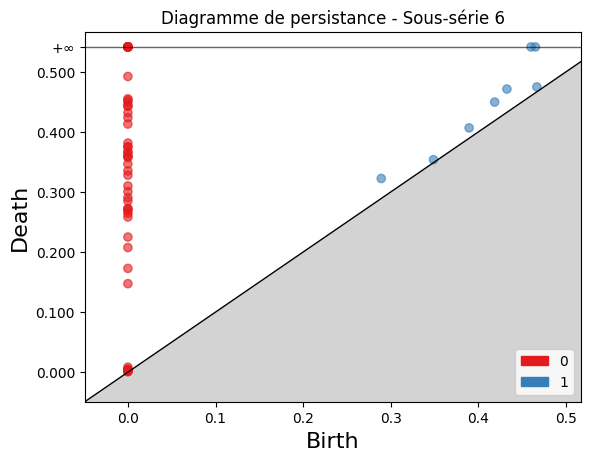

Sous-série 7: Diagramme de persistance


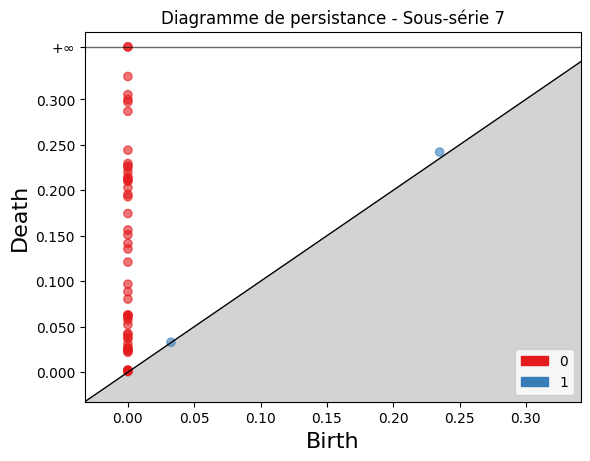

Sous-série 8: Diagramme de persistance


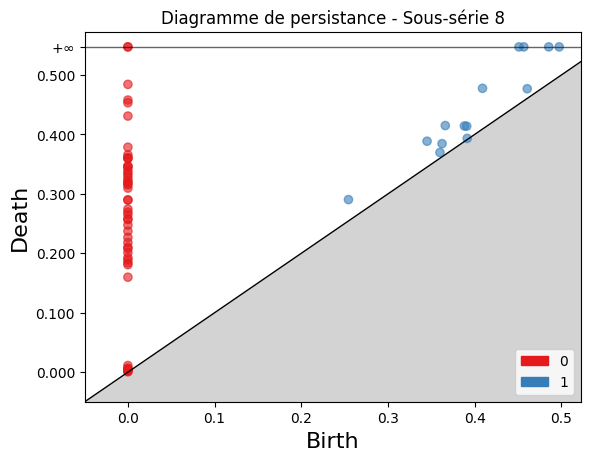

Sous-série 9: Diagramme de persistance


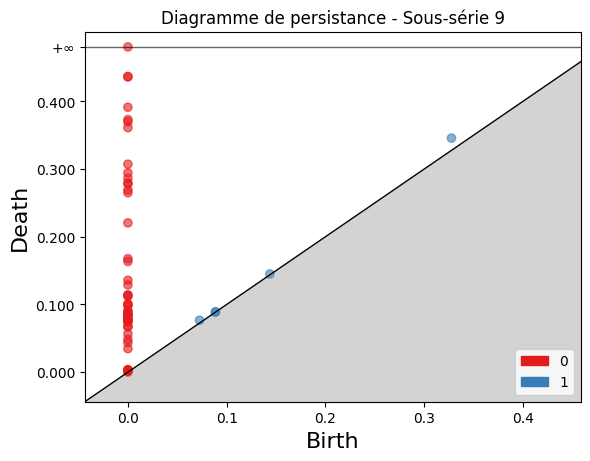

Sous-série 10: Diagramme de persistance


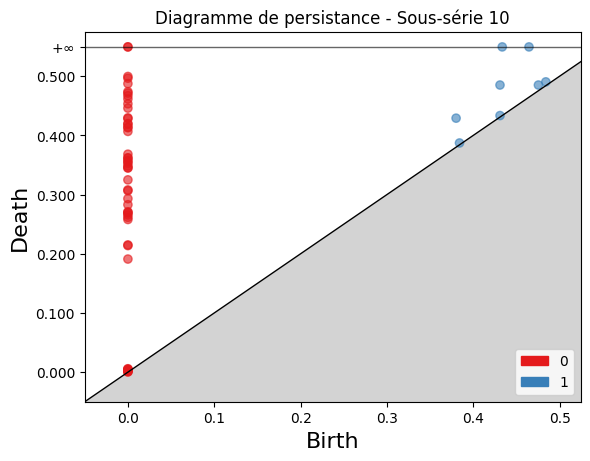

Sous-série 11: Diagramme de persistance


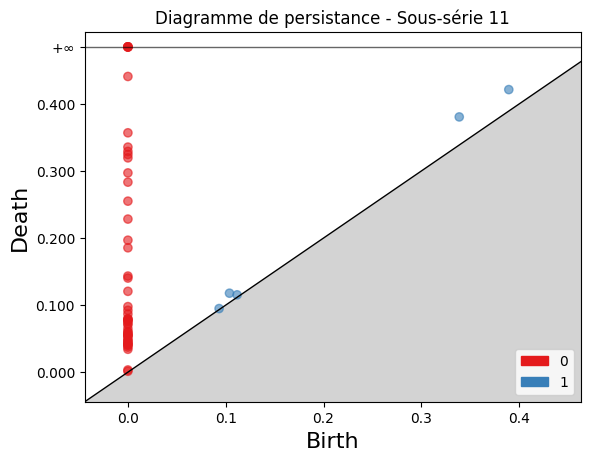

Sous-série 12: Diagramme de persistance


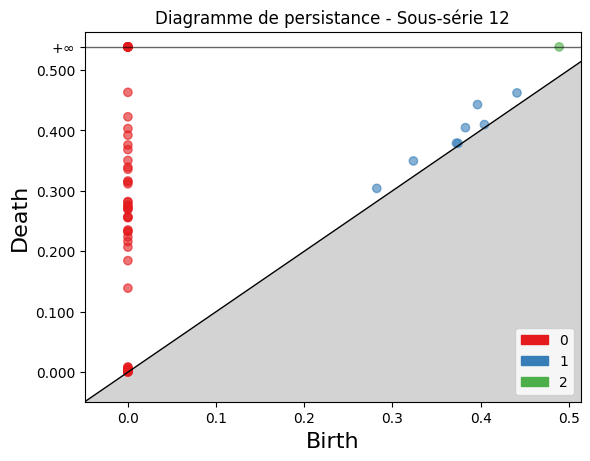

Sous-série 13: Diagramme de persistance


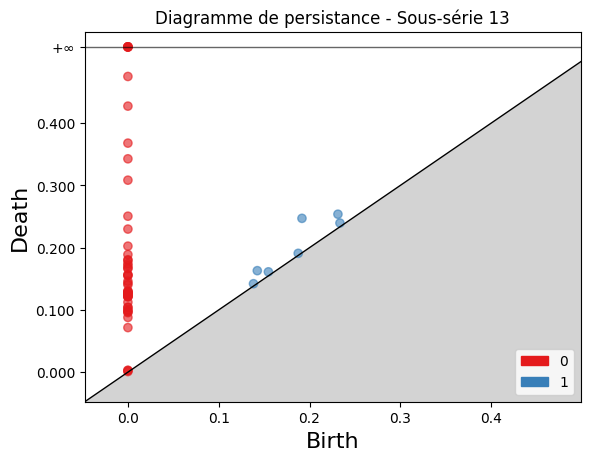

Sous-série 14: Diagramme de persistance


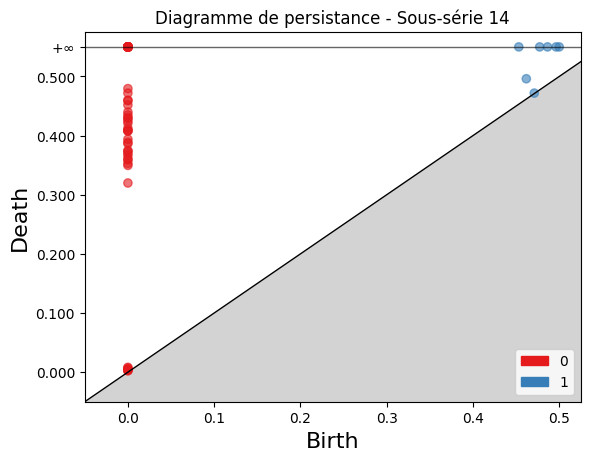

Sous-série 15: Diagramme de persistance


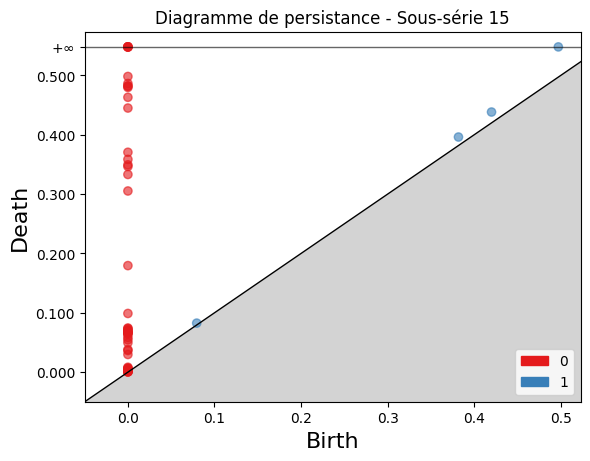

Sous-série 16: Diagramme de persistance


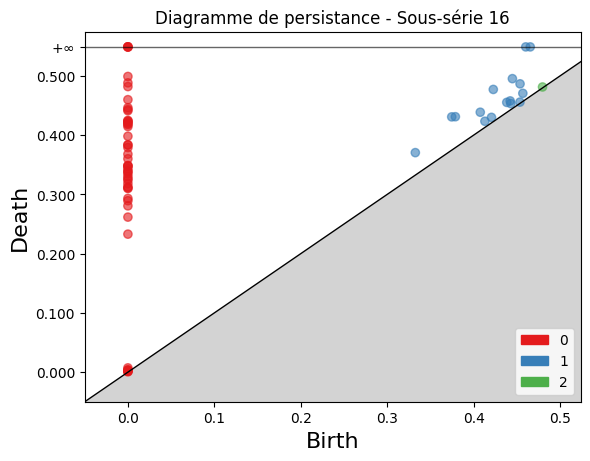

Sous-série 17: Diagramme de persistance


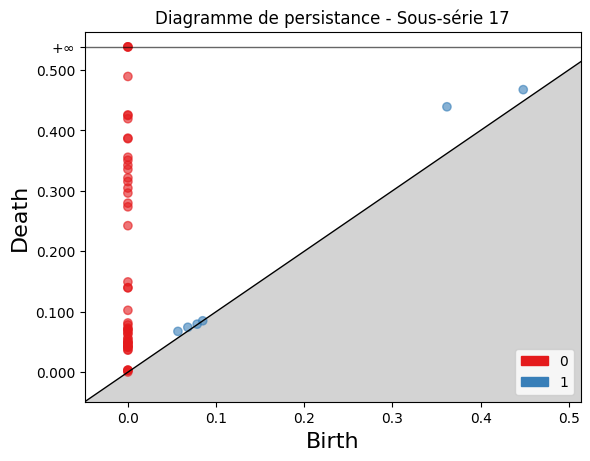

Sous-série 18: Diagramme de persistance


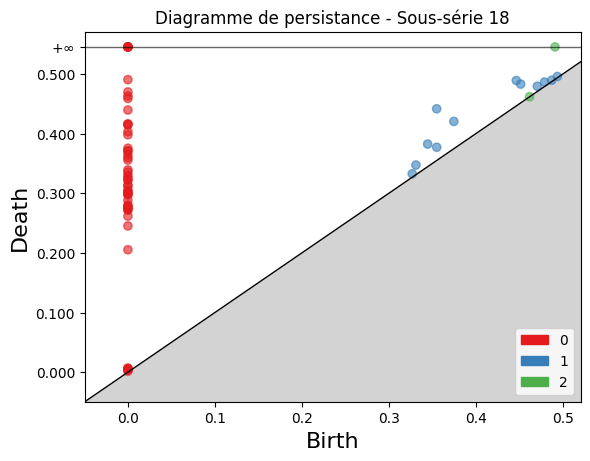

Sous-série 19: Diagramme de persistance


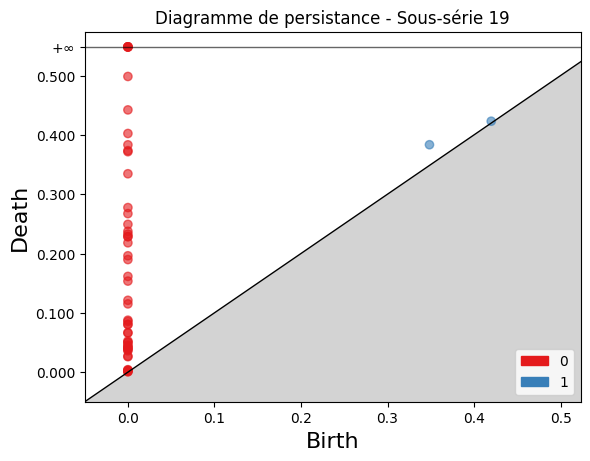

Sous-série 20: Diagramme de persistance


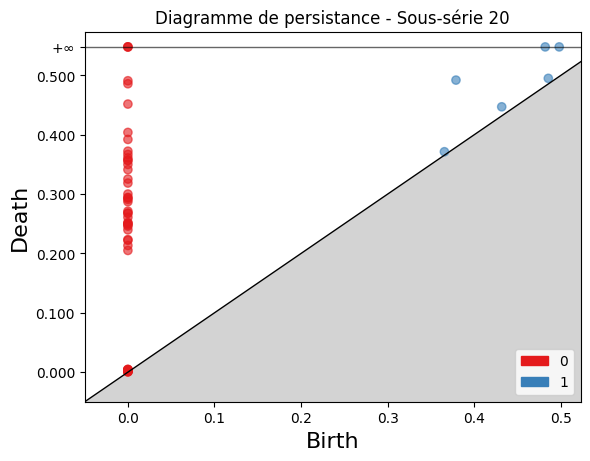

Sous-série 21: Diagramme de persistance


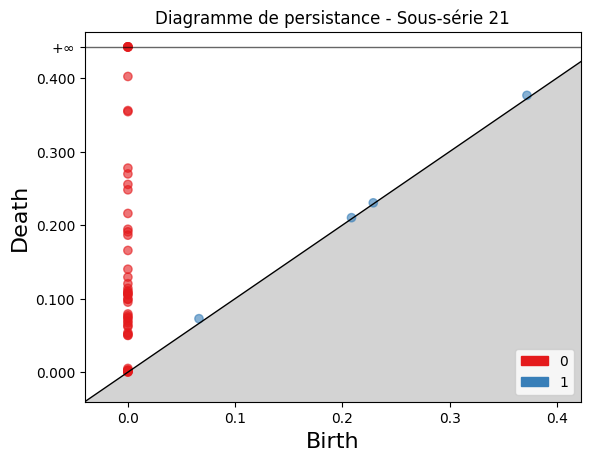

Sous-série 22: Diagramme de persistance


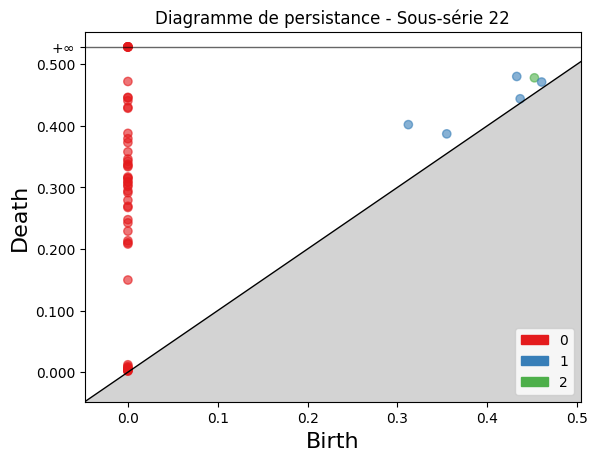

Sous-série 23: Diagramme de persistance


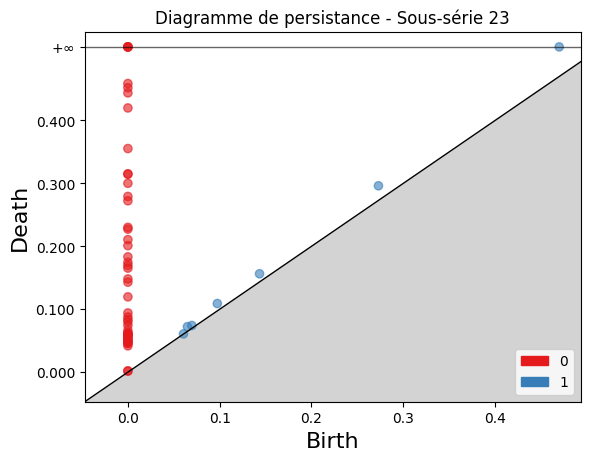

Sous-série 24: Diagramme de persistance


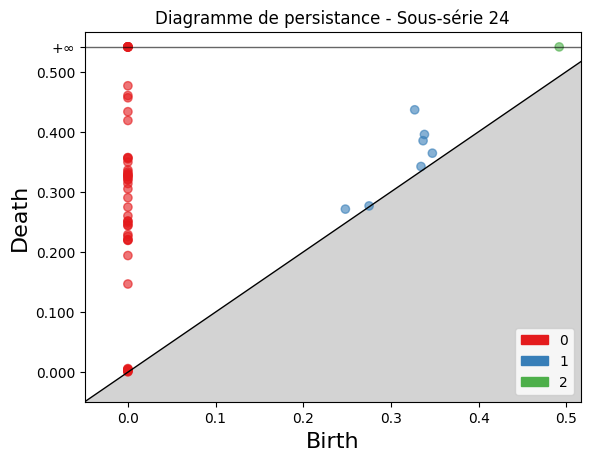

Sous-série 25: Diagramme de persistance


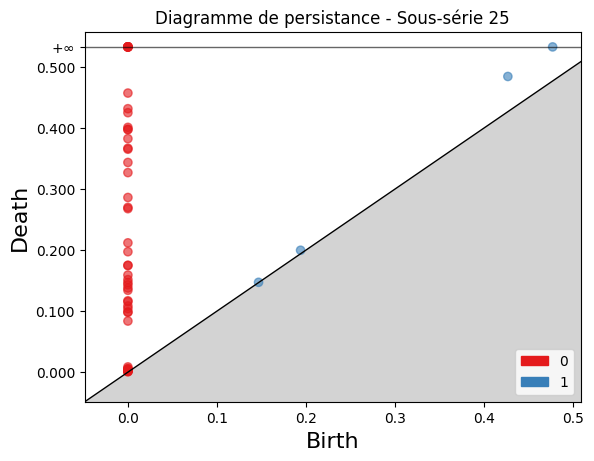

In [ ]:
import gudhi as gd
import matplotlib.pyplot as plt

# Calcul et visualisation de la persistance pour chaque sous-série
for i, simplex_tree in enumerate(rips_complexes):
    # Calculer la persistance
    pers = simplex_tree.persistence()

    # Afficher le diagramme de persistance
    print(f"Sous-série {i + 1}: Diagramme de persistance")
    gd.plot_persistence_diagram(pers)
    plt.title(f"Diagramme de persistance - Sous-série {i + 1}")
    plt.show()


### **5.1.1 Pouvait on déviner la différence entre les questions 3 et 4 en regardant la persistance de ce complexe ?**

**Conclusion:** Les diagrammes de persistance de la classe 0 sont semblables entre eux( apart les sous-séries 1 et 3 qui sont un peu différente, les sous-série 5, 7, 9, 11 .. sont très similaires). Mais lorsque l'on compare ces schémas avec d'autres classes on observe une différence **structure topologique**.

Cependant lorsque l'on prends les diagrammes de persistance des autres sous-séries mais de différentes classes, ils sont très similaires (mêmes nuages de points, mêmes zones de naissance et de mort) ce qui suggére un manque de différenciation entre classes. En termes de **structure topologique** (jusqu’à la dimension 1), ces classes n’ont pas de différences marquées

Ainsi, **Oui!** en regardant la persistence de ce complexe on aurait pu déviner la différence entre les question 3 et 4, car lorsque l'on enlève la classe 0, on ne reste qu'avec des classes qui ont la même structure topologique.

🏆 Je comprends mieux maintenant pourquoi mon modèle performe moin bien lorsque je lui enlève la classe 0 !!!!



---



##### Fonction Landscape et courbe de Betti

In [1]:
!pip uninstall -y gudhi
!pip install gudhi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 26.0 MB/s eta 0:00:00


In [2]:
import gudhi
print(gudhi.__version__)

3.11.0


In [3]:
!pip install ripser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.3/841.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.3 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18102 sha256=55a900c045b38642ae8c3b3597066128323b6786adb0d31bb9f01ddc0bd45764
  Stored in directory: /root/.cache/pip/wheels/1f/cc/2d/de23a8b9ae586817b0b44de4a4b1a08f23473e248a644b312f
Successfully built hopcroftkarp


Temps d'exécution trop long (1 h)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


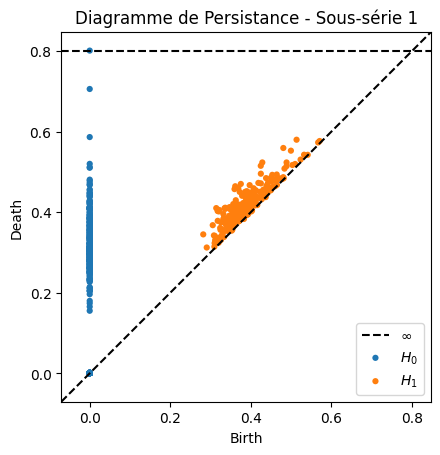

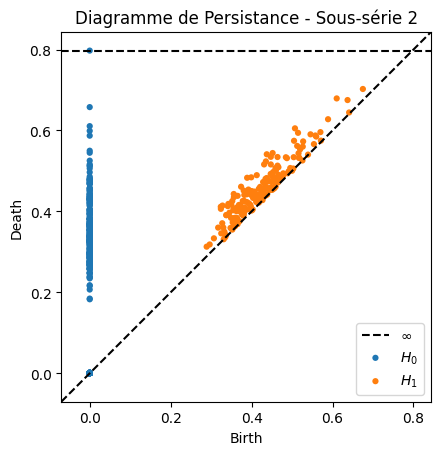

In [ ]:
from ripser import Rips
import matplotlib.pyplot as plt

# Calcul des diagrammes de persistance avec Ripser
rips = Rips()
diagrams = [rips.fit_transform(sub.select_dtypes(include=['float64', 'int64']).values) for sub in normalized_sub_series]

# Visualisation des paysages
for i, dgms in enumerate(diagrams[:2]):
    rips.plot(dgms, show=False)
    plt.title(f"Diagramme de Persistance - Sous-série {i + 1}")
    plt.show()

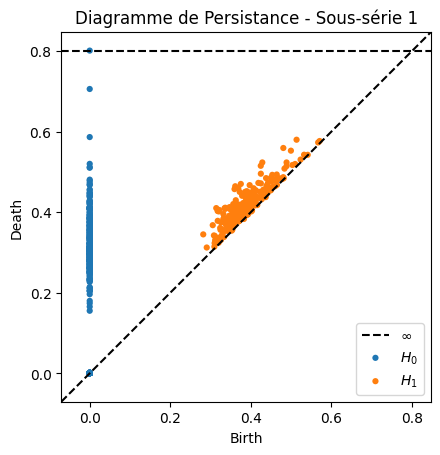

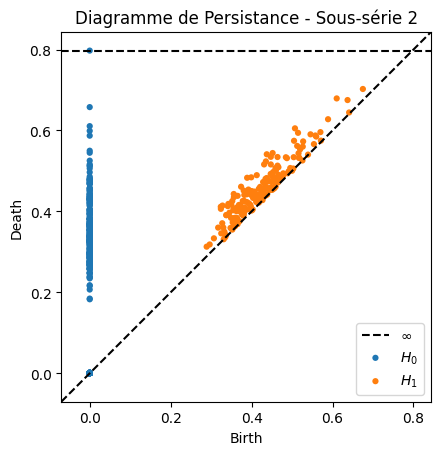

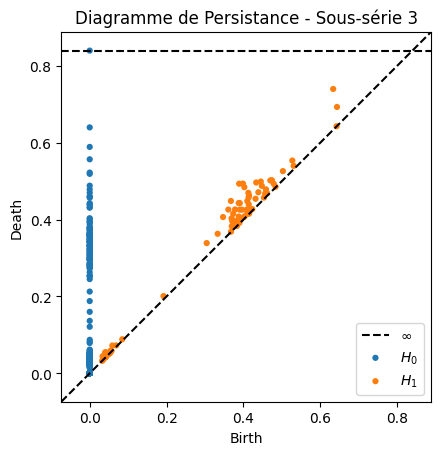

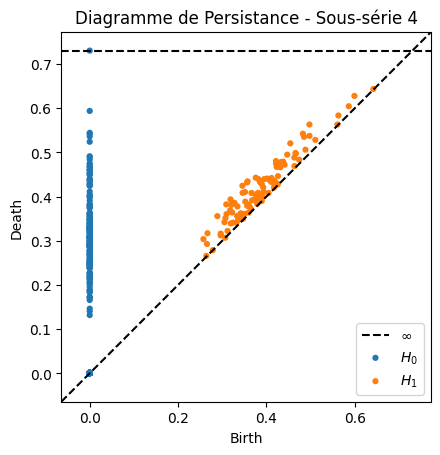

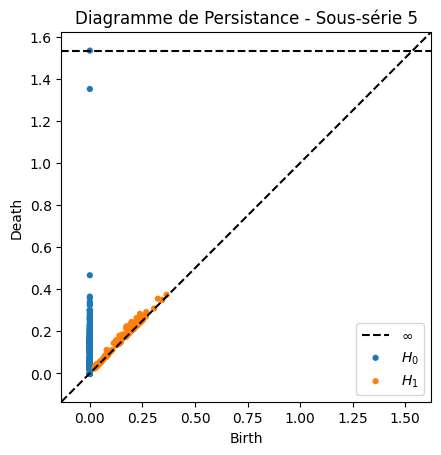

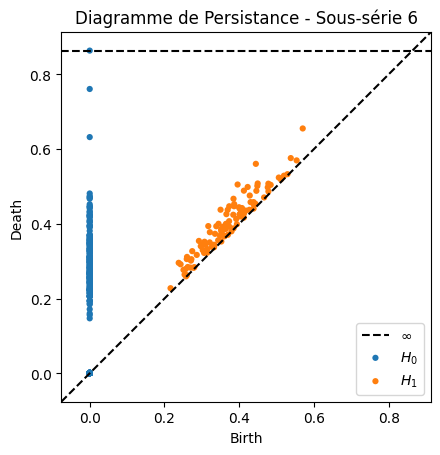

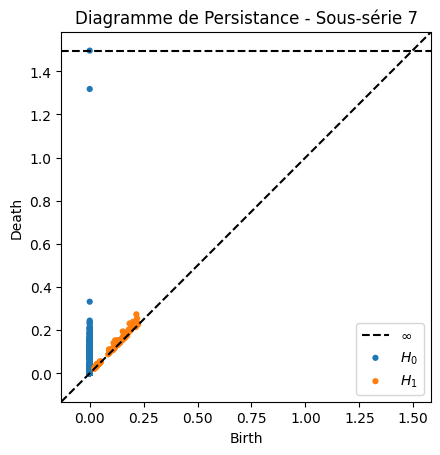

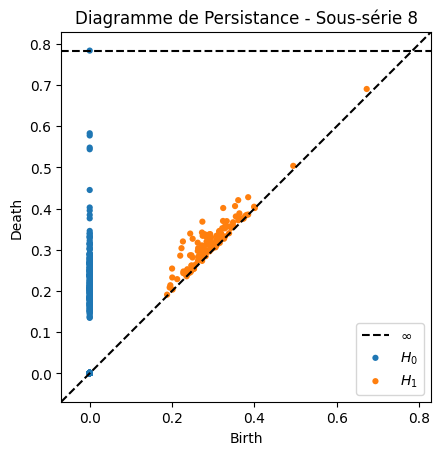

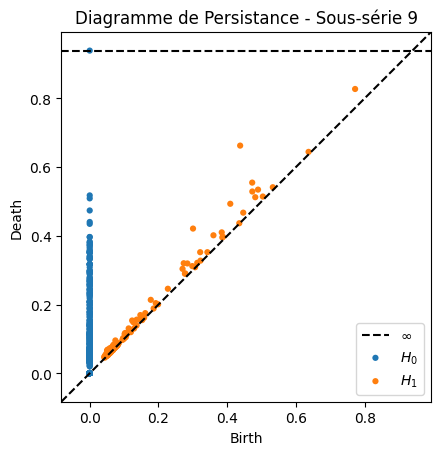

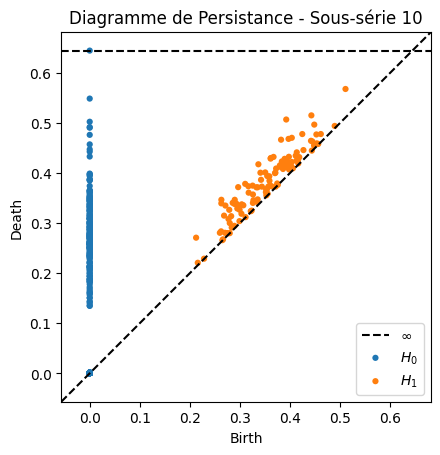

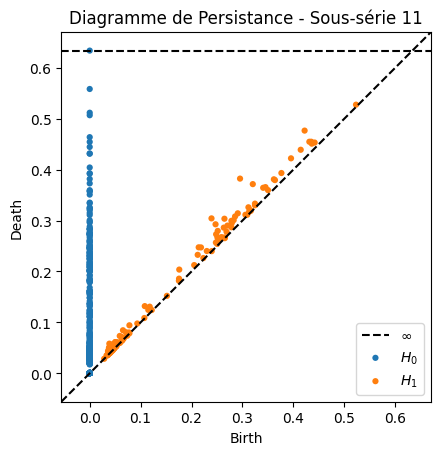

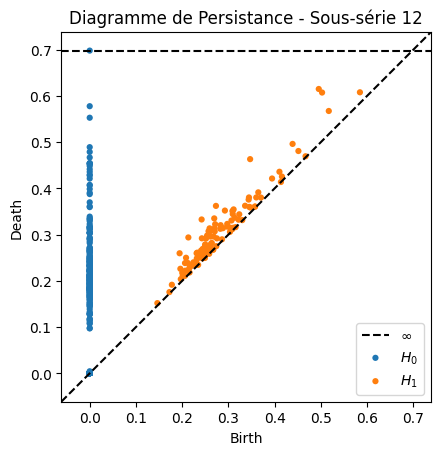

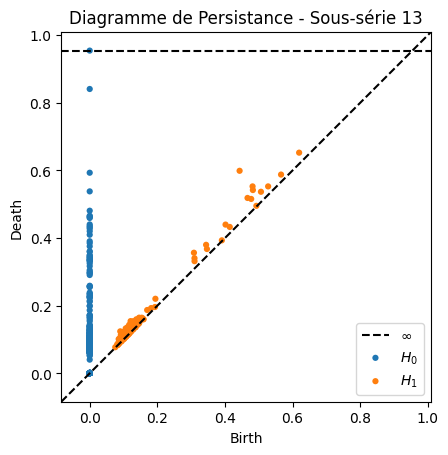

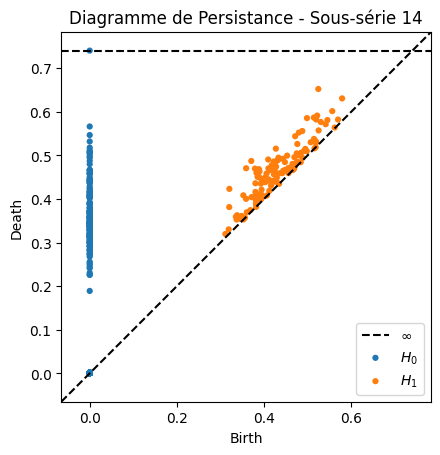

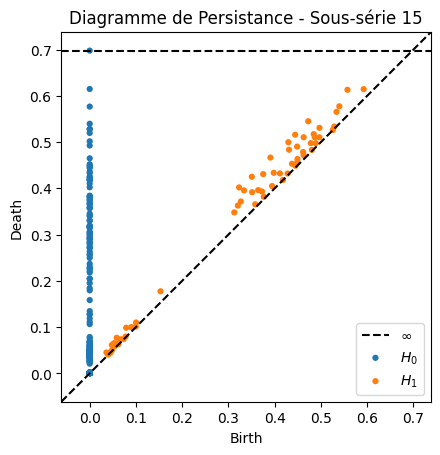

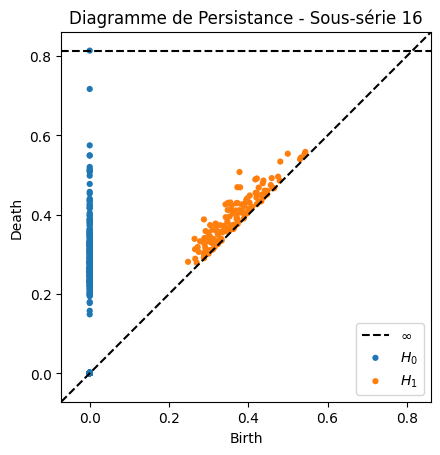

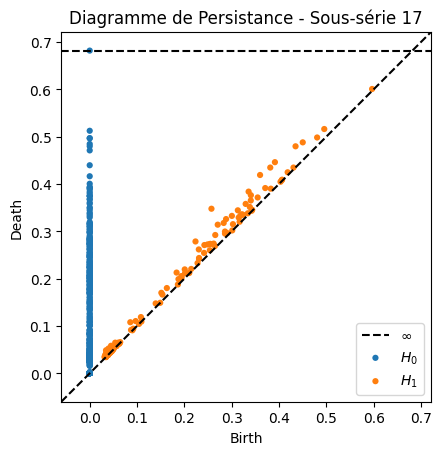

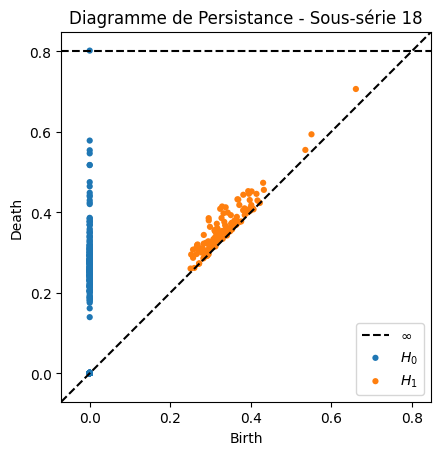

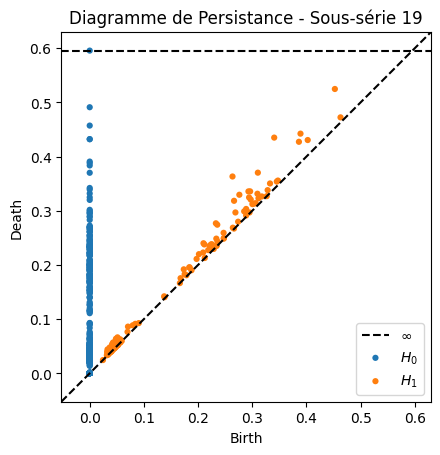

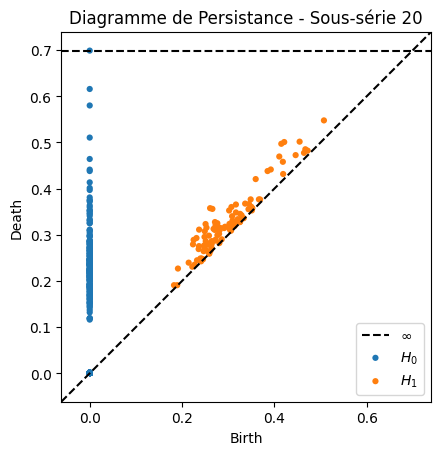

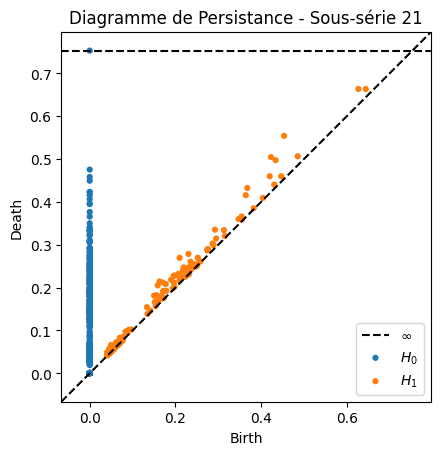

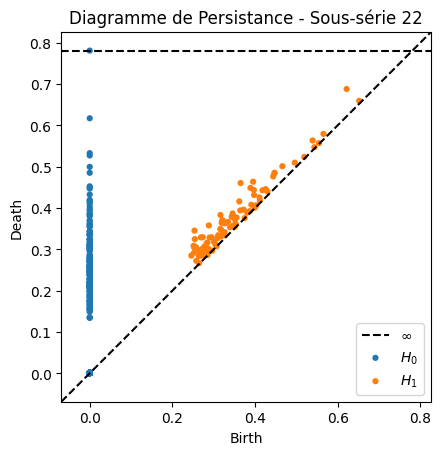

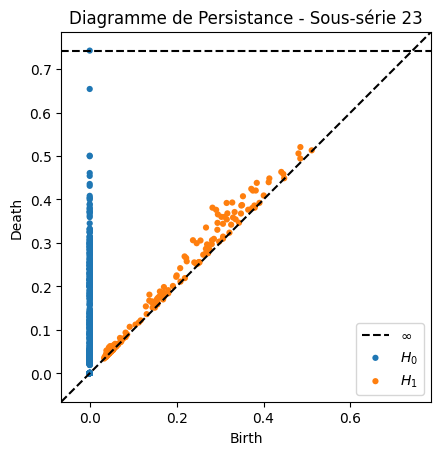

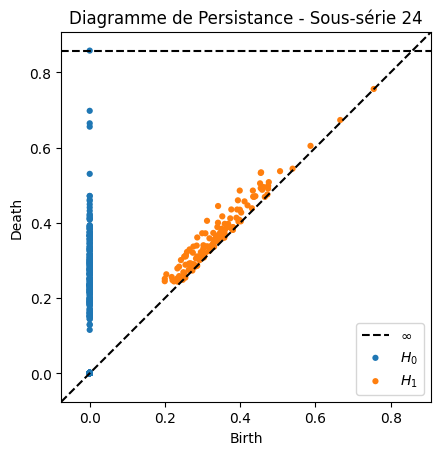

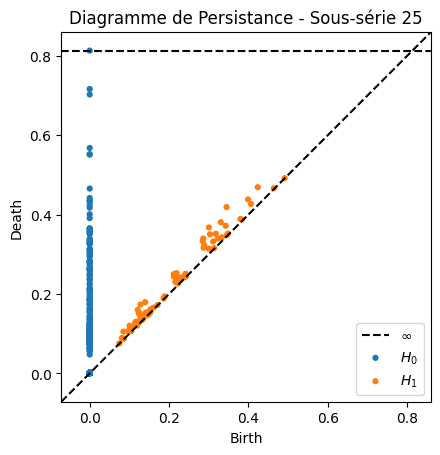

In [ ]:
for i, dgms in enumerate(diagrams):
    rips.plot(dgms, show=False)
    plt.title(f"Diagramme de Persistance - Sous-série {i + 1}")
    plt.show()

In [8]:
!pip install --upgrade ripser

In [ ]:
import numpy as np
from ripser import Rips
from persim import PersistenceImager  # Utiliser PersistenceImager au lieu de PersImage
import matplotlib.pyplot as plt

# Initialiser Ripser
rips = Rips()

# Liste pour stocker les images de persistance
persistence_images = []

# Calcul des images de persistance pour chaque sous-série
for i, sub in enumerate(normalized_sub_series):
    # Extraire les points du nuage
    point_cloud = sub.select_dtypes(include=['float64', 'int64']).values

    # Calculer le diagramme de persistance avec Ripser
    diagrams = rips.fit_transform(point_cloud)

    # Filtrer seulement le diagramme pour l'homologie H1
    diagram = [(b, d) for b, d in diagrams[1] if d != np.inf]

    if not diagram:
        print(f"Aucun diagramme pour la sous-série {i + 1}.")
        continue

    # Créer une image de persistance avec PersistenceImager
    pim = PersistenceImager(
        pixel_size=0.1,  # Taille des pixels (équivalent à l'ancien paramètre `spread`)
        birth_range=(0, 5),  # Plage des valeurs de naissance
        death_range=(0, 5),  # Plage des valeurs de mort
        weight_function="linear",  # Fonction de pondération
        kernel_type="gaussian"  # Type de noyau utilisé
    )

    # Transformer le diagramme en image
    img = pim.transform(diagram)
    persistence_images.append(img)

# Afficher les images de persistance
for i, img in enumerate(persistence_images):
    plt.imshow(img, cmap='Blues')  # Correction : utiliser un nom de colormap valide (sans '-')
    plt.title(f"Image de Persistance - Sous-série {i + 1}")
    plt.colorbar()
    plt.show()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)




---



### 5.2 **Courbes de Betti et Barcode**

Calcul et représentation des **courbes de Betti** pour la dimension 0.

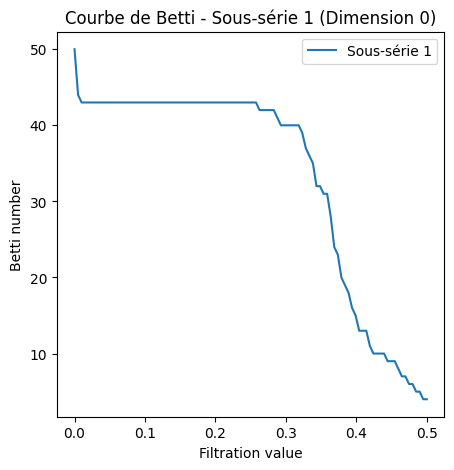

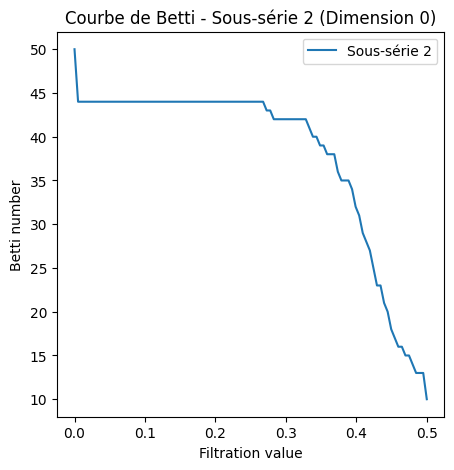

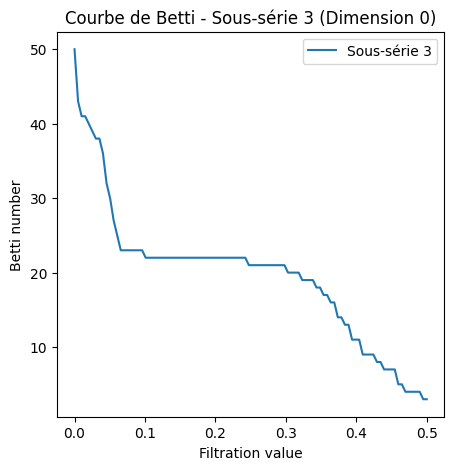

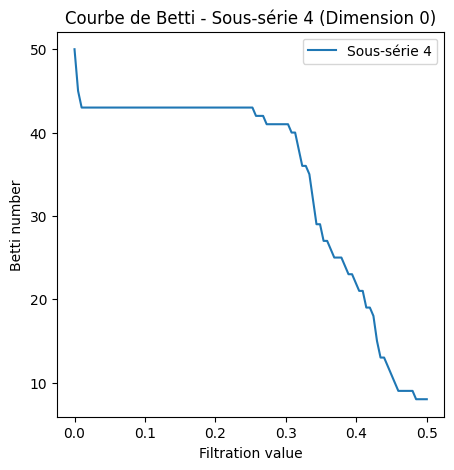

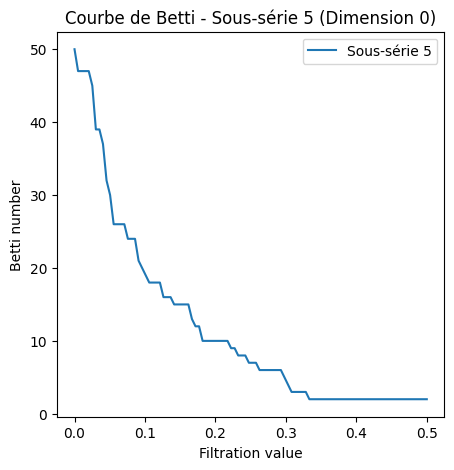

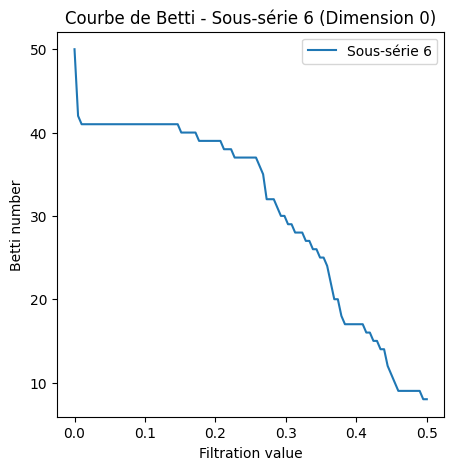

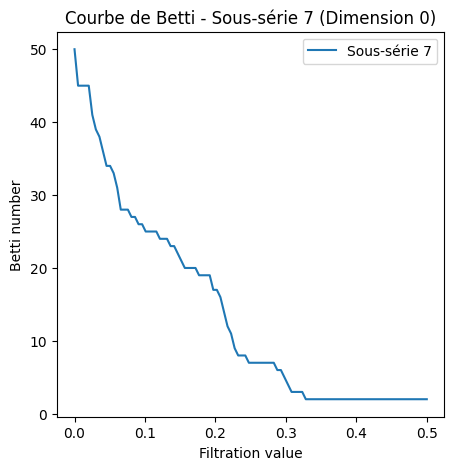

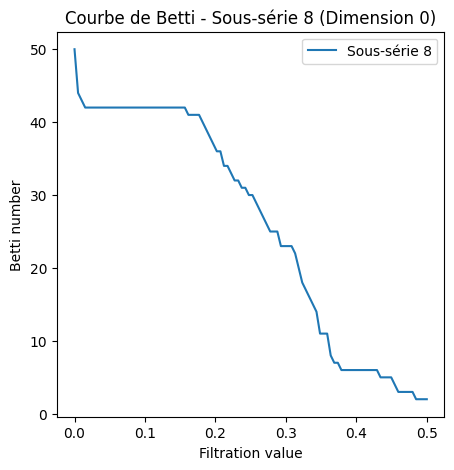

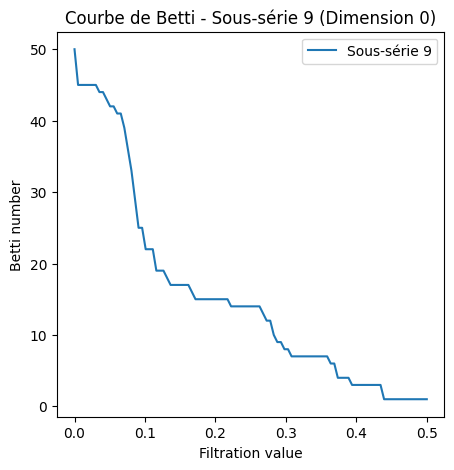

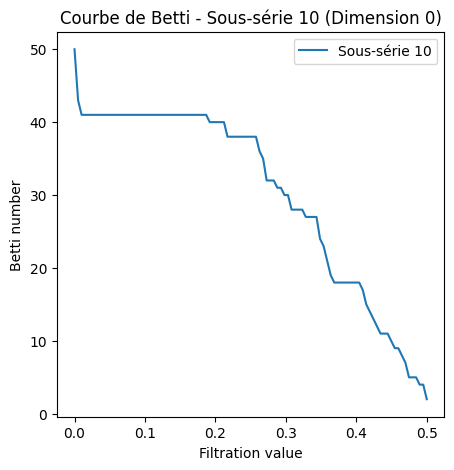

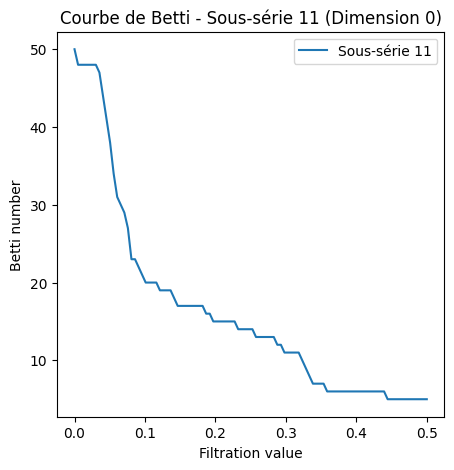

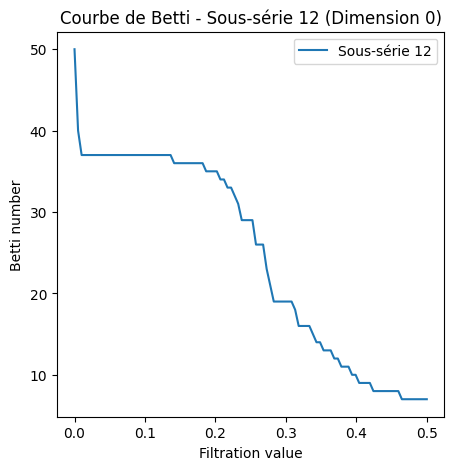

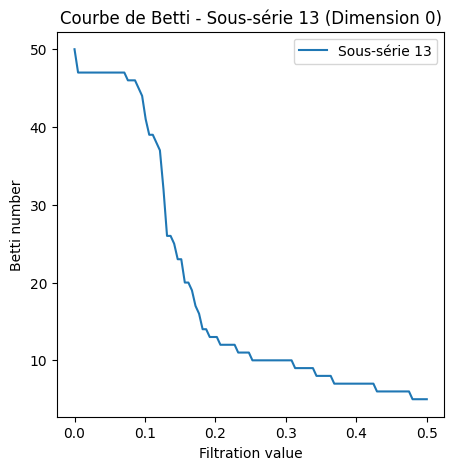

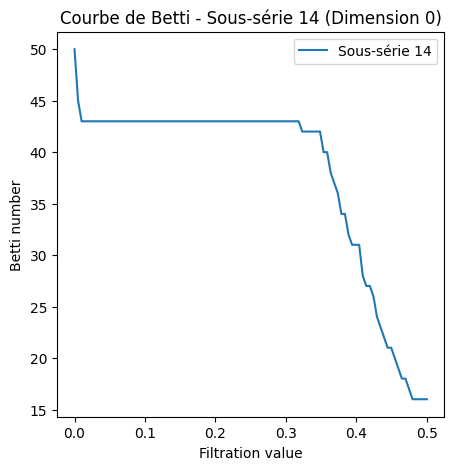

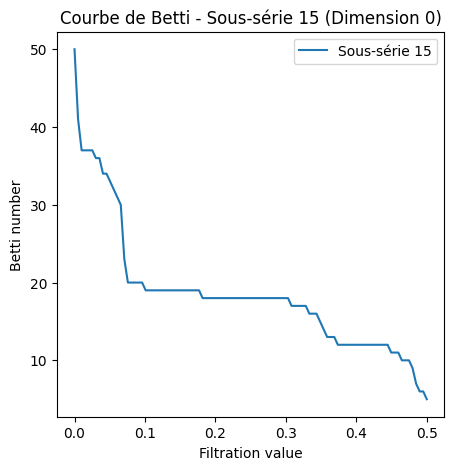

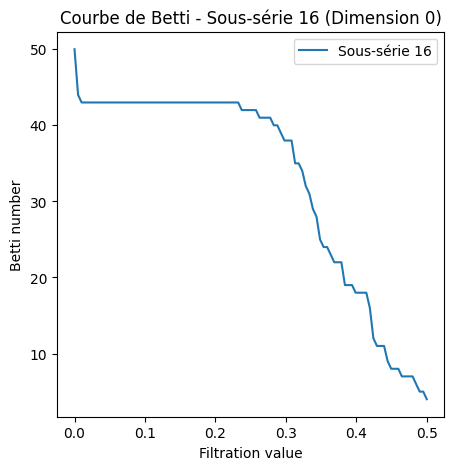

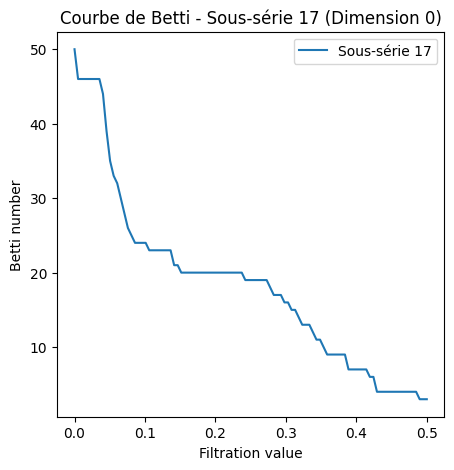

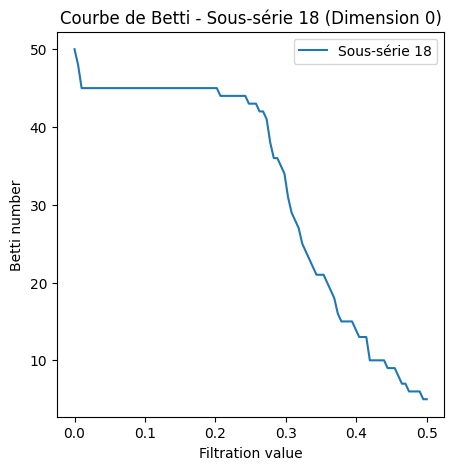

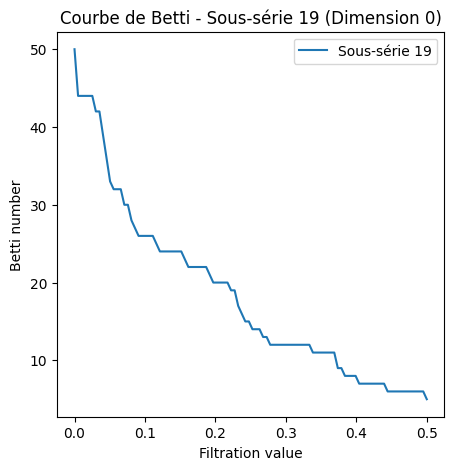

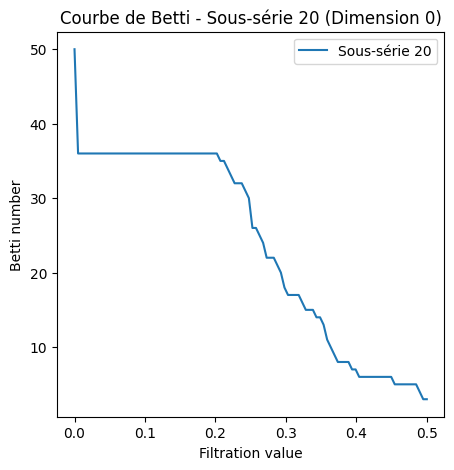

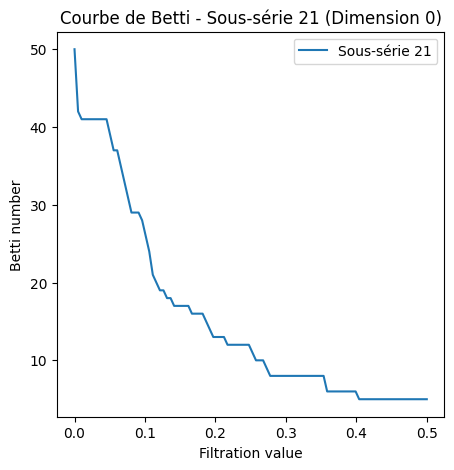

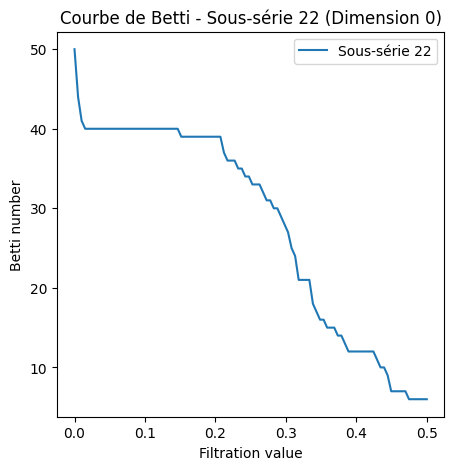

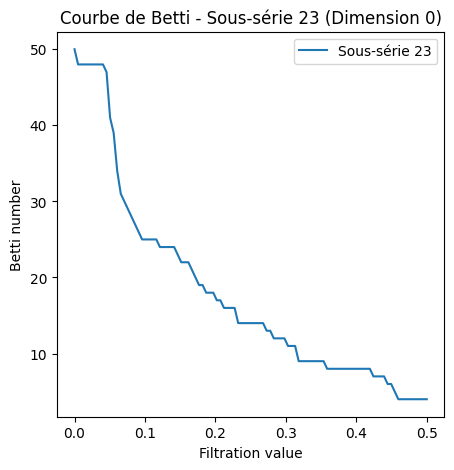

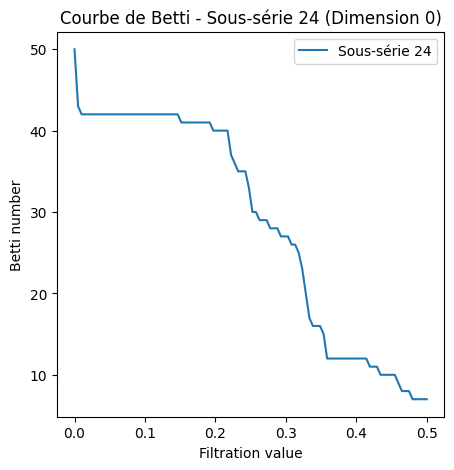

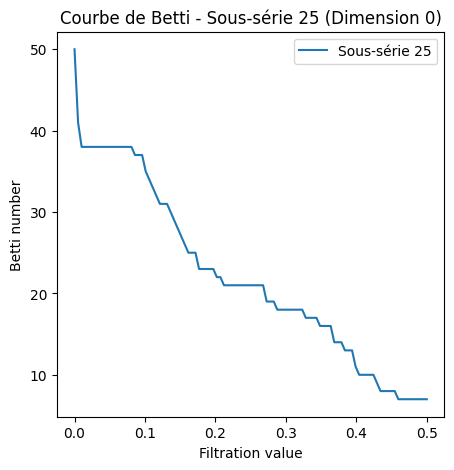

In [ ]:
from gudhi.representations import BettiCurve
import numpy as np
import matplotlib.pyplot as plt

# Paramètres pour calculer les courbes de Betti
sample_range = [0, 0.5]  # Intervalle sur lequel calculer les courbes
n_samples = 100  # Nombre de points d'échantillonnage
sample_points = np.linspace(sample_range[0], sample_range[1], n_samples)

betti_curves = BettiCurve(sample_range=sample_range)#, n_values=n_samples)

# Calculer et tracer les courbes de Betti pour chaque sous-série
for i, simplex_tree in enumerate(rips_complexes):
    # Extraire les intervalles de persistance pour la dimension 0
    intervals_dim_0 = simplex_tree.persistence_intervals_in_dimension(0)

    # Calculer la courbe de Betti pour la dimension 0
    betti_curve_dim_0 = betti_curves.fit_transform([intervals_dim_0])[0]

    # Tracer la courbe de Betti
    plt.figure(figsize=(5, 5))
    plt.plot(sample_points, betti_curve_dim_0, label=f"Sous-série {i + 1}")
    plt.title(f"Courbe de Betti - Sous-série {i + 1} (Dimension 0)")
    plt.xlabel("Filtration value")
    plt.ylabel("Betti number")
    plt.legend()
    plt.show()


Comment **interpreter les graphes ?**

**L'axe des abscisses (Filtration value)** : Rayon du Rips Complex. On part d’un rayon 0 (où chaque point est isolé) et on va jusqu’à 0.5, où les points peuvent commencer à se connecter fortement.

**Axe des ordonnées (Betti number)** : Nombre de composantes connexes. Au début (filtration≈0), chaque point est isolé, donc le nombre de composantes connexes est égal au nombre de points. Plus la courbe est haute au départ, plus on a de points (ou plus la sous-série est longue).


Au fur et à mesure que la filtration augmente, certains points se rapprochent et forment des clusters. Le nombre de composantes connexes commence alors à diminuer. Les courbes montrent à quel point les points se regroupent facilement :

-  Une **décroissance rapide**  du Betti number signifie que les points se connectent vite (clusters proches).
- Une **décroissance plus lente** indique des sous-séries avec des points plus éloignés formant plus longtemps des clusters isolés.

In [ ]:
!pip install gudhi
!pip install giotto-tda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.6/460.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


**Bar code :** pour représenter graphiquement de tous les intervalles de vie

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import gudhi

from sklearn.preprocessing import MinMaxScaler

# Charger les données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"
data = pd.read_csv(url, sep="\t")

# Identifier les indices où la classe change
changes = data['class'].diff().ne(0)
change_indices = changes[changes].index.tolist()
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Découper le DataFrame en sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])

# Normalisation
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
scaler.fit(data[numeric_columns])

normalized_sub_series = []
for sub in sub_series:
    sub_scaled = sub.copy()
    sub_scaled[numeric_columns] = scaler.transform(sub[numeric_columns])
    normalized_sub_series.append(sub_scaled)

J'ai été obligé de prendre `max_dimension` =1 et `max_edge_length` = 0.5 parce que au delà de ces valeurs la session plante.

Calcul du Barcode pour la sous-série 1 ...


/usr/local/lib/python3.11/dist-packages/gudhi/persistence_graphical_tools.py:107: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


<Figure size 600x400 with 0 Axes>

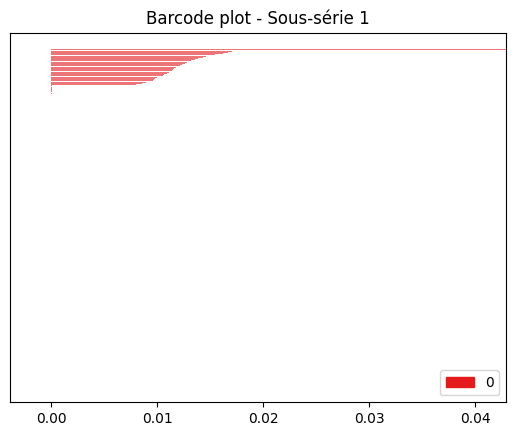

Calcul du Barcode pour la sous-série 2 ...


<Figure size 600x400 with 0 Axes>

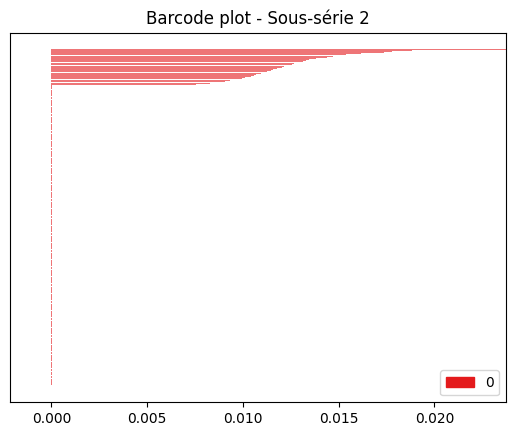

Calcul du Barcode pour la sous-série 3 ...


<Figure size 600x400 with 0 Axes>

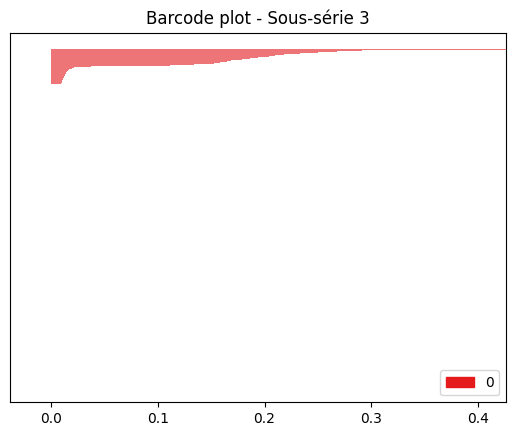

Calcul du Barcode pour la sous-série 4 ...


<Figure size 600x400 with 0 Axes>

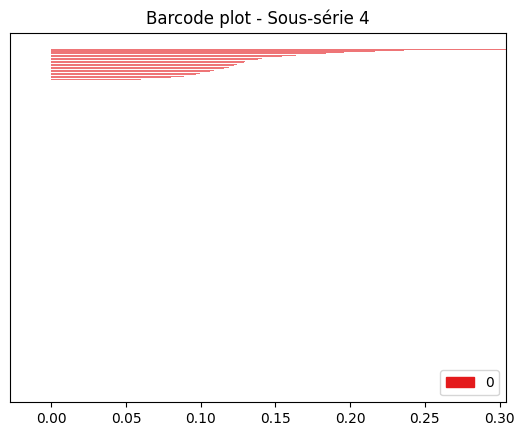

Calcul du Barcode pour la sous-série 5 ...


<Figure size 600x400 with 0 Axes>

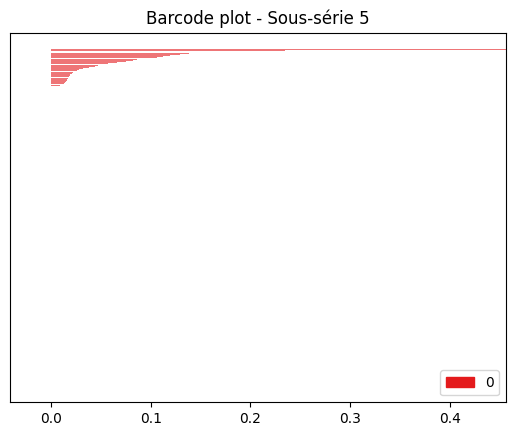

Calcul du Barcode pour la sous-série 6 ...


<Figure size 600x400 with 0 Axes>

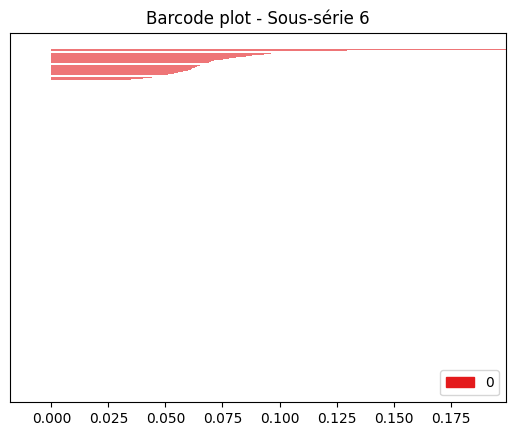

Calcul du Barcode pour la sous-série 7 ...


<Figure size 600x400 with 0 Axes>

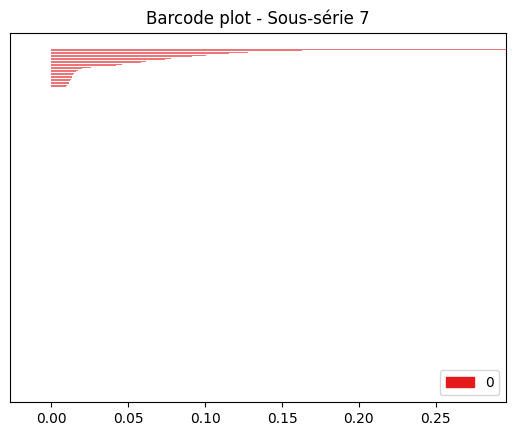

Calcul du Barcode pour la sous-série 8 ...


<Figure size 600x400 with 0 Axes>

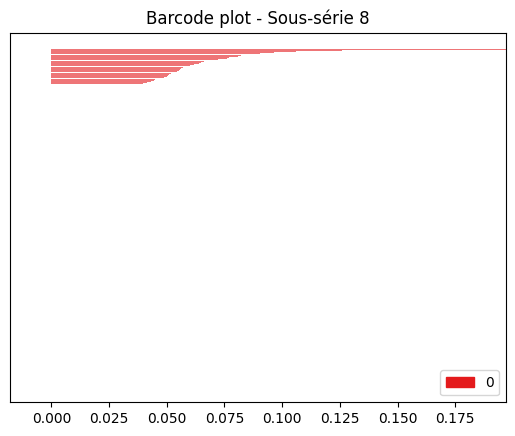

Calcul du Barcode pour la sous-série 9 ...


<Figure size 600x400 with 0 Axes>

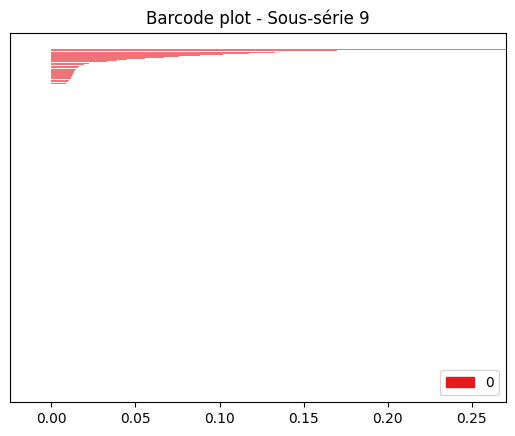

Calcul du Barcode pour la sous-série 10 ...


<Figure size 600x400 with 0 Axes>

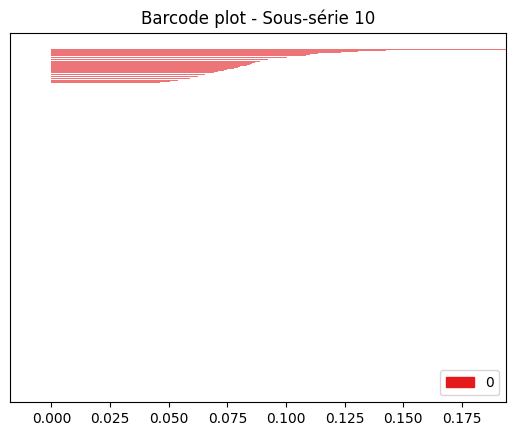

Calcul du Barcode pour la sous-série 11 ...


<Figure size 600x400 with 0 Axes>

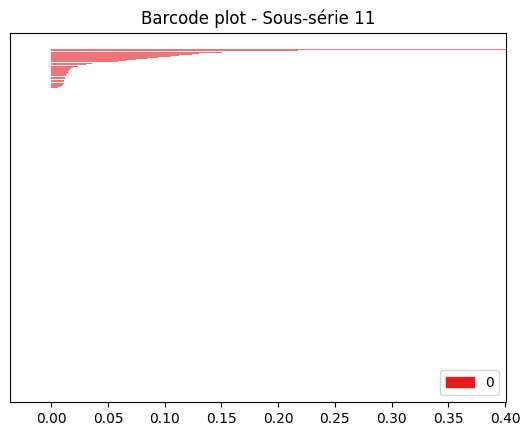

Calcul du Barcode pour la sous-série 12 ...


<Figure size 600x400 with 0 Axes>

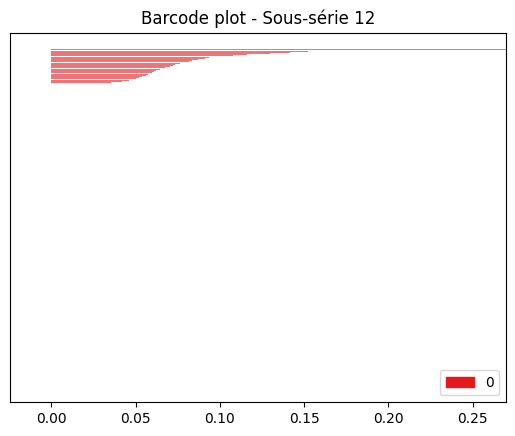

Calcul du Barcode pour la sous-série 13 ...


<Figure size 600x400 with 0 Axes>

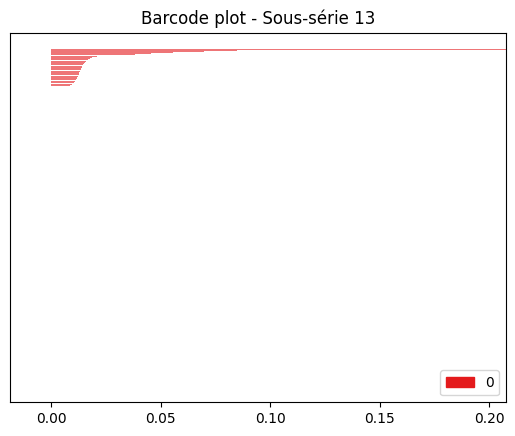

Calcul du Barcode pour la sous-série 14 ...


<Figure size 600x400 with 0 Axes>

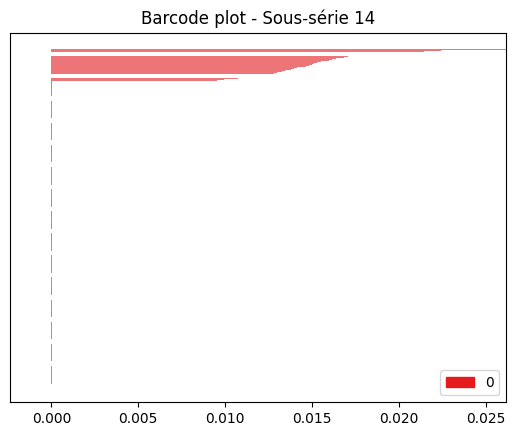

Calcul du Barcode pour la sous-série 15 ...


<Figure size 600x400 with 0 Axes>

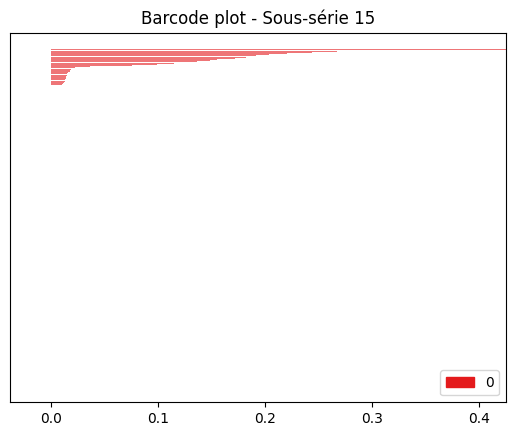

Calcul du Barcode pour la sous-série 16 ...


<Figure size 600x400 with 0 Axes>

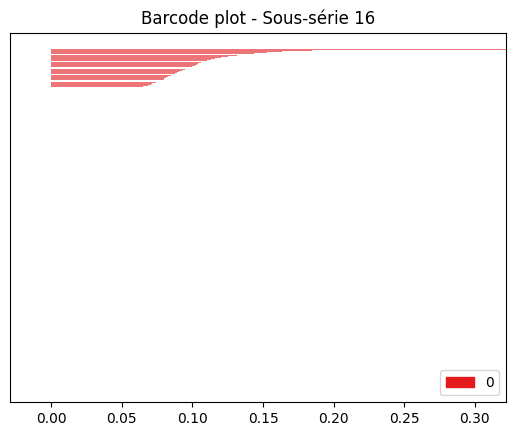

Calcul du Barcode pour la sous-série 17 ...


<Figure size 600x400 with 0 Axes>

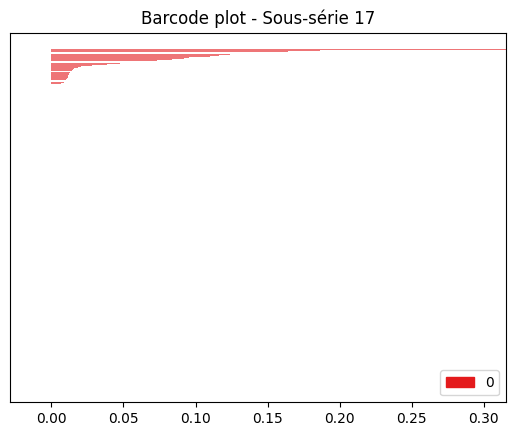

Calcul du Barcode pour la sous-série 18 ...


<Figure size 600x400 with 0 Axes>

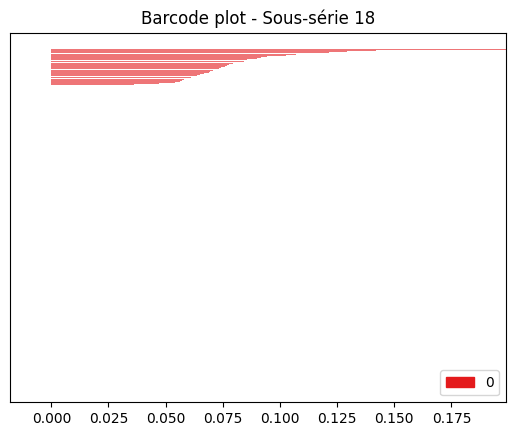

Calcul du Barcode pour la sous-série 19 ...


<Figure size 600x400 with 0 Axes>

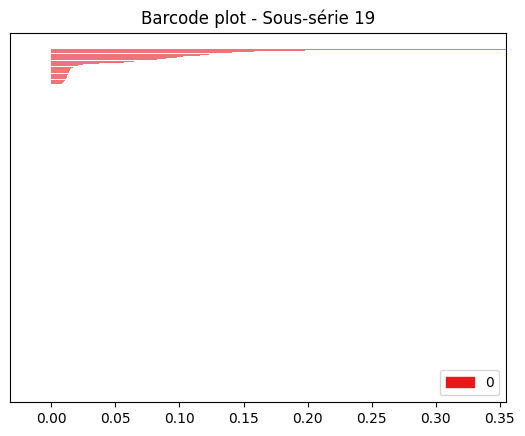

Calcul du Barcode pour la sous-série 20 ...


<Figure size 600x400 with 0 Axes>

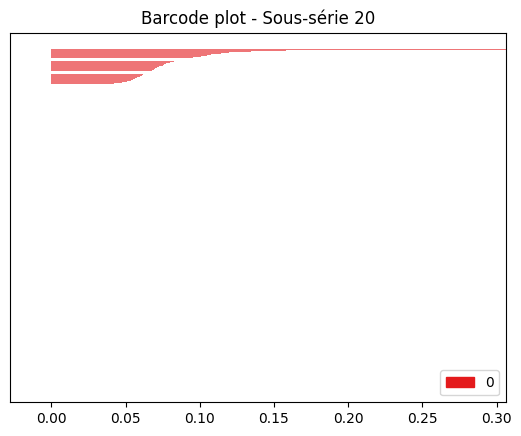

Calcul du Barcode pour la sous-série 21 ...


<Figure size 600x400 with 0 Axes>

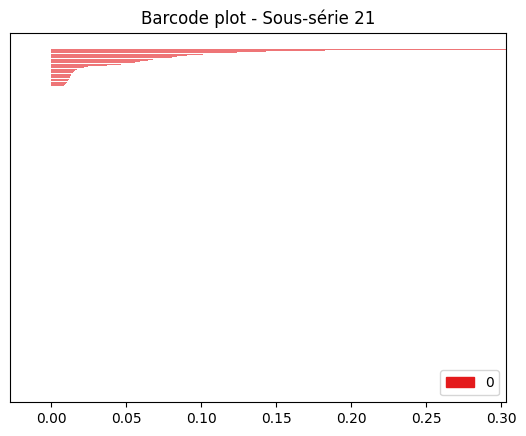

Calcul du Barcode pour la sous-série 22 ...


<Figure size 600x400 with 0 Axes>

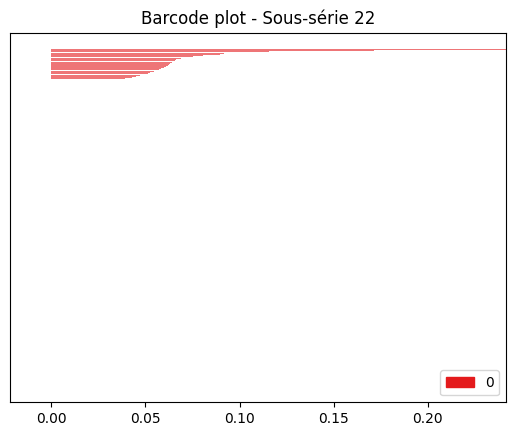

Calcul du Barcode pour la sous-série 23 ...


<Figure size 600x400 with 0 Axes>

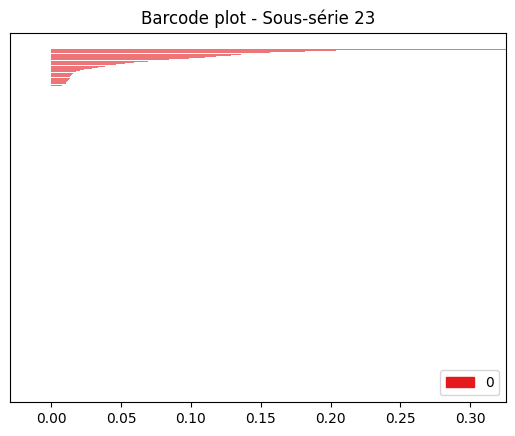

Calcul du Barcode pour la sous-série 24 ...


<Figure size 600x400 with 0 Axes>

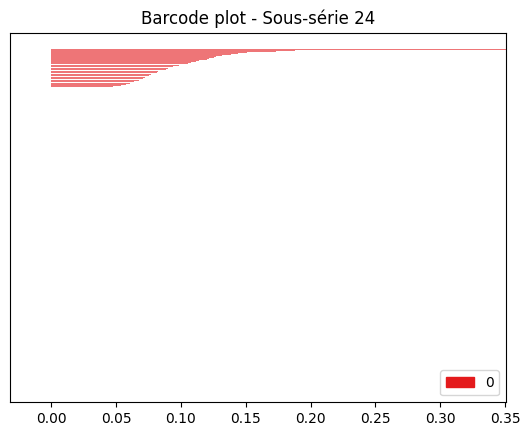

Calcul du Barcode pour la sous-série 25 ...


<Figure size 600x400 with 0 Axes>

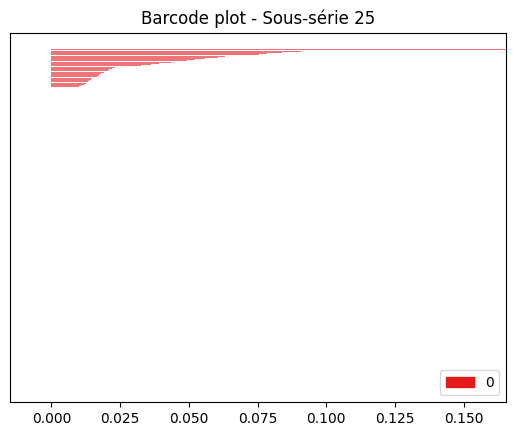

In [ ]:
# Paramètres pour le Rips Complex
max_edge_length = 0.5  # À ajuster selon la distribution de nos données
max_dimension = 1       # Calcul de la persistance jusqu'à la dimension 2 (composantes, boucles)

# Calcul et affichage du Barcode pour chaque sous-série
for i, sub in enumerate(normalized_sub_series, start=1):
    print(f"Calcul du Barcode pour la sous-série {i} ...")

    # Extraire les données numériques comme nuage de points
    X = sub[numeric_columns].values

    # Créer un Rips Complex
    rips_complex = gudhi.RipsComplex(points=X, max_edge_length=max_edge_length)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)

    # Calculer la persistance
    persistence = simplex_tree.persistence()

    # Afficher le Barcode (bande de persistance)
    plt.figure(figsize=(6, 4))
    gudhi.plot_persistence_barcode(persistence)
    plt.title(f"Barcode plot - Sous-série {i}")
    plt.show()


De manière générale, on constate que la plupart des barres naissent très tôt (
Birth≈0) et meurent rapidement, ce qui indique que beaucoup de points se trouvent à des distances faibles les uns des autres. Malheureusement le GPU ne permet pas d'effectuer le calcul à des dimensions supérieures pour pouvoir observer l'évolution des boucles



---



### **5.3 Complexe simplicial :**

 Des graphes Mapper permettant d'explorer les relations topologiques entre les points et de visualiser les `classes` seront générés.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from gtda.mapper import make_mapper_pipeline, CubicalCover, plot_static_mapper_graph
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Charger les données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"
data = pd.read_csv(url, sep="\t")

# Identifier où les changements de label se produisent
changes = data['class'].diff().ne(0)
change_indices = changes[changes].index.tolist()
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])

Je normalise les données **sans enlever** la colonne `class`

In [ ]:
# Normalisation par sous-série
normalized_sub_series = []
scaler = MinMaxScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

On fait un **normalisation globale**

In [ ]:
# Normalisation globale
scaler.fit(data[numeric_columns])
for sub in sub_series:
    sub_scaled = sub.copy()
    sub_scaled[numeric_columns] = scaler.transform(sub[numeric_columns])
    normalized_sub_series.append(sub_scaled)

On enlève la colonne `class` à chaque sous-série avant de construire le **complexe simplicial**

In [ ]:
#normalized_sub_series = [sub.drop(columns=['class']) for sub in normalized_sub_series]

On utilise une **projection PCA** comme fonction de filtrage.

In [ ]:
# Configuration de la pipeline Mapper
n_intervals = 10
overlap = 0.3
epsilon = 0.1
filter_func = PCA(n_components=2)  # Utilisation de PCA comme fonction de filtrage

pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=CubicalCover(n_intervals=n_intervals, overlap_frac=overlap),
    clusterer=DBSCAN(eps=epsilon),
    n_jobs=1
)


In [ ]:
# Appliquer la pipeline Mapper à chaque sous-série normalisée
for i, sub_data in enumerate(normalized_sub_series):
    print(f"Traitement de la sous-série {i + 1} sur {len(normalized_sub_series)}")

    # Extraction des colonnes numériques de la sous-série
    point_cloud = sub_data[numeric_columns].to_numpy()

    # Application de la pipeline Mapper
    graph = pipe.fit_transform(point_cloud)

    # Paramètres pour le tracé
    plotly_params = {"node_trace": {"marker_colorscale": "Blues"}}
    color_data = sub_data['class'] if 'class' in sub_data.columns else None

    # Tracé du graphe Mapper
    fig = plot_static_mapper_graph(pipe, point_cloud, color_data=color_data, plotly_params=plotly_params)
    fig.update_layout(title=f"Graphe Mapper pour la sous-série {i + 1}")
    fig.show()

Traitement de la sous-série 1 sur 25


Traitement de la sous-série 2 sur 25


Traitement de la sous-série 3 sur 25


Traitement de la sous-série 4 sur 25


Traitement de la sous-série 5 sur 25


Traitement de la sous-série 6 sur 25


Traitement de la sous-série 7 sur 25


Traitement de la sous-série 8 sur 25


Traitement de la sous-série 9 sur 25


Traitement de la sous-série 10 sur 25


Traitement de la sous-série 11 sur 25


Traitement de la sous-série 12 sur 25


Traitement de la sous-série 13 sur 25


Traitement de la sous-série 14 sur 25


Traitement de la sous-série 15 sur 25


Traitement de la sous-série 16 sur 25


Traitement de la sous-série 17 sur 25


Traitement de la sous-série 18 sur 25


Traitement de la sous-série 19 sur 25


Traitement de la sous-série 20 sur 25


Traitement de la sous-série 21 sur 25


Traitement de la sous-série 22 sur 25


Traitement de la sous-série 23 sur 25


Traitement de la sous-série 24 sur 25


Traitement de la sous-série 25 sur 25


Pour pouvoir expliquer le Graphe Mapper, il faut au préalable observer les sous-séries et leurs clusters correspondants en faisant :

In [ ]:
for i, sub in enumerate(sub_series):
    # Récupérer toutes les classes présentes dans la sous-série
    classes_in_sub = sub['class'].unique()
    print(f"Sous-série {i+1}: classes = {classes_in_sub}")

Sous-série 1: classes = [0]
Sous-série 2: classes = [1]
Sous-série 3: classes = [0]
Sous-série 4: classes = [2]
Sous-série 5: classes = [0]
Sous-série 6: classes = [3]
Sous-série 7: classes = [0]
Sous-série 8: classes = [4]
Sous-série 9: classes = [0]
Sous-série 10: classes = [5]
Sous-série 11: classes = [0]
Sous-série 12: classes = [6]
Sous-série 13: classes = [0]
Sous-série 14: classes = [1]
Sous-série 15: classes = [0]
Sous-série 16: classes = [2]
Sous-série 17: classes = [0]
Sous-série 18: classes = [3]
Sous-série 19: classes = [0]
Sous-série 20: classes = [4]
Sous-série 21: classes = [0]
Sous-série 22: classes = [5]
Sous-série 23: classes = [0]
Sous-série 24: classes = [6]
Sous-série 25: classes = [0]


### **5.3.1 Interprétation globale du graphe Mapper**


Ainsi, lorsque l'on observe le graphe Mapper de la sous-série 2 et celui de la sous-série 14, on observe les mêmes propriétés topologiques, ceci surement parcequ'elles sont de la même classe 1. Pour la sous-série 4 et 16 qui sont de la classe 2, les propriétés topologiques similaires ne sont pas vraiment visible.

Lorsque l'on observe le graphe Mapper de la sous-série 6 et la sous-série 18 qui sont de la classe 3 on observe les mêmes propriétés topologiques.

Pareillement pour la sous-série 8 et la sous-série 20 qui sont de classes 4, on observe que leurs graphes Mapper ont des propriétés topologiques similaires.

Il en est de même pour les sous-séries 10 et 22 de classe 5.

**On peut conclure qu'il y'a une cohérence de classe à travers le temps ou différents segments de notre dataset.**
